# TFG - VIU - Carlos Romero Matarin

https://code.earthengine.google.com/

1. Carga de librerías y archivos

In [5]:
import os
import numpy as np
import rasterio
import matplotlib.pyplot as plt
from glob import glob

folder = "C:/Users/crome/Desktop/VIU/Code/Datos/AMB/"
tif_files = sorted(glob(os.path.join(folder, 'AMB_*.tif')))

# Importar librerías necesarias
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D, concatenate
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
import cv2
import matplotlib.pyplot as plt

# Configuración inicial
IMAGE_SIZE = 256  # Tamaño al que redimensionaremos las imágenes y máscaras
BATCH_SIZE = 20  # Tamaño del lote
EPOCHS = 50 # Número de épocas
LEARNING_RATE = 1e-4 # Tasa de aprendizaje

2. Función para visualizar RGB + máscara

In [6]:
def plot_image_with_cropmask(tif_path):
    with rasterio.open(tif_path) as src:
        img = src.read()  # (bands, rows, cols)
        profile = src.profile

    # Asignar bandas RGB
    rgb = np.stack([img[0], img[1], img[2]], axis=-1)  # B4, B3, B2
    rgb = np.clip(rgb, 0, 10000) / 10000  # Normalizar

    crop = img[3]  # Banda EUCROPMAP

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
    ax1.imshow(rgb)
    ax1.set_title('Imagen RGB')
    ax1.axis('off')

    ax2.imshow(crop, cmap='tab20', interpolation='none')
    ax2.set_title('Máscara EUCROPMAP')
    ax2.axis('off')

    plt.suptitle(os.path.basename(tif_path))
    plt.tight_layout()
    plt.show()

3. Visualizar todas

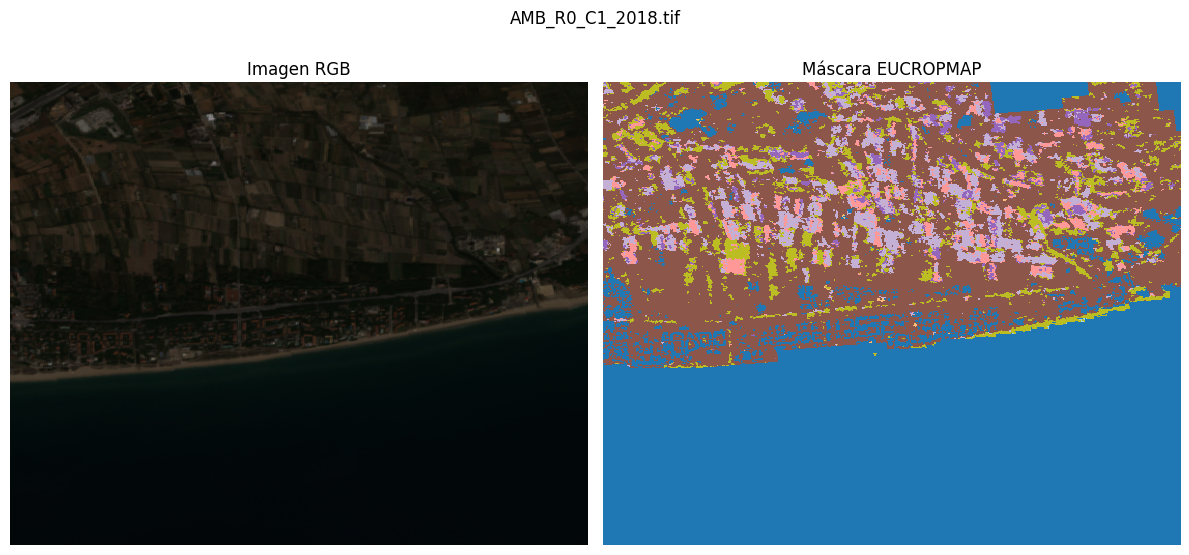

In [ ]:
if tif_files:
    plot_image_with_cropmask(tif_files[0])

4. Análisis estadístico por celda (EUCROPMAP)

In [ ]:
import pandas as pd

# Lista para guardar los resultados
estadisticas = []
imagenes = []

# Procesar cada imagen
for tif in tif_files:
    with rasterio.open(tif) as src:
        img = src.read()
        imagenes.append((os.path.basename(tif), img))

    crop = img[3]
    clases, counts = np.unique(crop, return_counts=True) # Obtener las clases
    total = counts.sum()

    for clase, count in zip(clases, counts):
        estadisticas.append({ 
            'archivo': os.path.basename(tif),
            'clase': int(clase), # Clase de la máscara EUCROPMAP
            'pixeles': int(count), # Número de píxeles
            'porcentaje': round(100 * count / total, 2) # Porcentaje de píxeles
        })

# Crear DataFrame
df_stats = pd.DataFrame(estadisticas)
df_stats.head()


archivo  clase  pixeles  porcentaje
0  AMB_R0_C1_2018.tif      0   122386       49.07
1  AMB_R0_C1_2018.tif    100       75        0.03
2  AMB_R0_C1_2018.tif    211      874        0.35
3  AMB_R0_C1_2018.tif    212      929        0.37
4  AMB_R0_C1_2018.tif    213     2091        0.84

5. Tabla resumen de clases por imagen (en %)

In [ ]:
df_resumen = df_stats.pivot_table(index='archivo', columns='clase', values='porcentaje', fill_value=0)
df_resumen = df_resumen.round(2)

# Mostrar el DataFrame resumen
df_resumen

clase                  0     100   211   212    213  214   215   216   221  \
archivo                                                                      
AMB_R0_C1_2018.tif   49.07  0.03  0.35  0.37   0.84  0.0  0.00  0.48  0.01   
AMB_R0_C2_2018.tif   90.05  0.00  0.01  0.01   0.01  0.0  0.00  0.00  0.00   
AMB_R0_C3_2018.tif   98.82  0.00  0.00  0.00   0.00  0.0  0.00  0.00  0.00   
AMB_R0_C4_2018.tif  100.00  0.00  0.00  0.00   0.00  0.0  0.00  0.00  0.00   
AMB_R0_C5_2018.tif  100.00  0.00  0.00  0.00   0.00  0.0  0.00  0.00  0.00   
...                    ...   ...   ...   ...    ...  ...   ...   ...   ...   
AMB_R9_C5_2018.tif   18.33  0.02  0.61  0.53   7.15  0.0  0.07  0.01  0.00   
AMB_R9_C6_2018.tif   31.73  0.28  1.30  0.88   8.90  0.0  0.00  0.01  0.00   
AMB_R9_C7_2018.tif    9.15  0.06  1.17  0.75  10.99  0.0  0.01  0.03  0.00   
AMB_R9_C8_2018.tif   18.79  0.05  0.70  0.51   4.06  0.0  0.00  0.01  0.00   
AMB_R9_C9_2018.tif    9.51  0.03  0.31  0.26   1.76  0.0  0.00  0.02  0.00   

clase               223   230   231   232  233   240   250   290    300   500  \
archivo                                                                         
AMB_R0_C1_2018.tif  0.0  0.36  0.32  0.00  0.0  1.13  0.85  5.38  35.24  5.56   
AMB_R0_C2_2018.tif  0.0  0.00  0.00  0.00  0.0  0.00  0.03  0.12   8.18  1.58   
AMB_R0_C3_2018.tif  0.0  0.00  0.00  0.00  0.0  0.00  0.00  0.01   1.03  0.14   
AMB_R0_C4_2018.tif  0.0  0.00  0.00  0.00  0.0  0.00  0.00  0.00   0.00  0.00   
AMB_R0_C5_2018.tif  0.0  0.00  0.00  0.00  0.0  0.00  0.00  0.00   0.00  0.00   
...                 ...   ...   ...   ...  ...   ...   ...   ...    ...   ...   
AMB_R9_C5_2018.tif  0.0  0.00  0.03  0.65  0.0  0.70  1.69  0.64  63.38  6.19   
AMB_R9_C6_2018.tif  0.0  0.00  0.03  0.38  0.0  1.29  1.97  1.25  46.11  5.87   
AMB_R9_C7_2018.tif  0.0  0.00  0.00  0.15  0.0  0.59  3.28  1.29  64.86  7.68   
AMB_R9_C8_2018.tif  0.0  0.00  0.00  0.20  0.0  0.57  1.84  0.94  64.70  7.63   
AMB_R9_C9_2018.tif  0.0  0.00  0.01  0.02  0.0  0.09  0.70  0.45  83.75  3.09   

clase                600  
archivo                   
AMB_R0_C1_2018.tif  0.01  
AMB_R0_C2_2018.tif  0.00  
AMB_R0_C3_2018.tif  0.00  
AMB_R0_C4_2018.tif  0.00  
AMB_R0_C5_2018.tif  0.00  
...                  ...  
AMB_R9_C5_2018.tif  0.00  
AMB_R9_C6_2018.tif  0.00  
AMB_R9_C7_2018.tif  0.00  
AMB_R9_C8_2018.tif  0.00  
AMB_R9_C9_2018.tif  0.00  

[99 rows x 20 columns]

6. Gráfico de distribución por clase

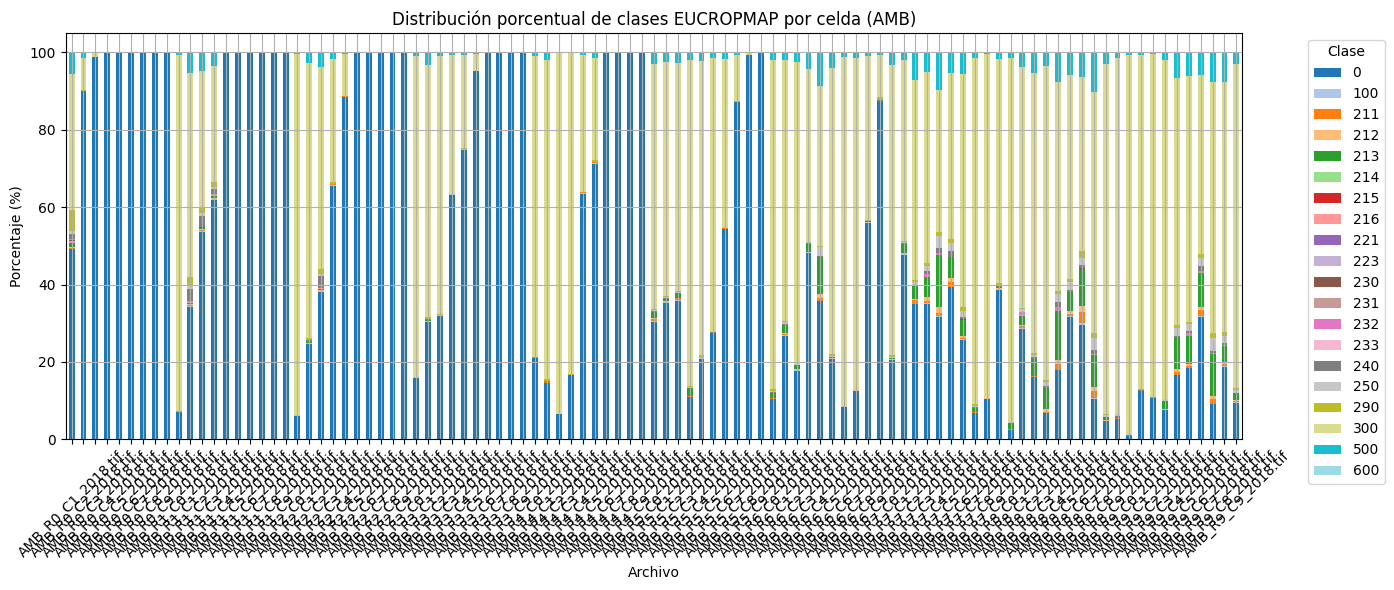

In [9]:
df_resumen.plot(kind='bar', stacked=True, figsize=(14, 6), colormap='tab20')
plt.title("Distribución porcentual de clases EUCROPMAP por celda (AMB)")
plt.ylabel("Porcentaje (%)")
plt.xlabel("Archivo")
plt.xticks(rotation=45)
plt.legend(title='Clase', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

 7. Análisis temporal por celda

In [10]:
# Extraer celda y año del nombre del archivo
df_stats['celda'] = df_stats['archivo'].str.extract(r'(R\d+_C\d+)')
df_stats['anio'] = df_stats['archivo'].str.extract(r'_(\d{4})')

# Pivot para ver cómo cambia cada clase en el tiempo por celda
pivot_tiempo = df_stats.pivot_table(index=['celda', 'anio'], columns='clase', values='porcentaje', fill_value=0)
pivot_tiempo.head()

clase          0     100   211   212   213  214  215   216   221  223   230  \
celda anio                                                                    
R0_C1 2018   49.07  0.03  0.35  0.37  0.84  0.0  0.0  0.48  0.01  0.0  0.36   
R0_C2 2018   90.05  0.00  0.01  0.01  0.01  0.0  0.0  0.00  0.00  0.0  0.00   
R0_C3 2018   98.82  0.00  0.00  0.00  0.00  0.0  0.0  0.00  0.00  0.0  0.00   
R0_C4 2018  100.00  0.00  0.00  0.00  0.00  0.0  0.0  0.00  0.00  0.0  0.00   
R0_C5 2018  100.00  0.00  0.00  0.00  0.00  0.0  0.0  0.00  0.00  0.0  0.00   

clase        231  232  233   240   250   290    300   500   600  
celda anio                                                       
R0_C1 2018  0.32  0.0  0.0  1.13  0.85  5.38  35.24  5.56  0.01  
R0_C2 2018  0.00  0.0  0.0  0.00  0.03  0.12   8.18  1.58  0.00  
R0_C3 2018  0.00  0.0  0.0  0.00  0.00  0.01   1.03  0.14  0.00  
R0_C4 2018  0.00  0.0  0.0  0.00  0.00  0.00   0.00  0.00  0.00  
R0_C5 2018  0.00  0.0  0.0  0.00  0.00  0.00   0.00  0.00  0.00

8. Visualizar evolución de una celda específica

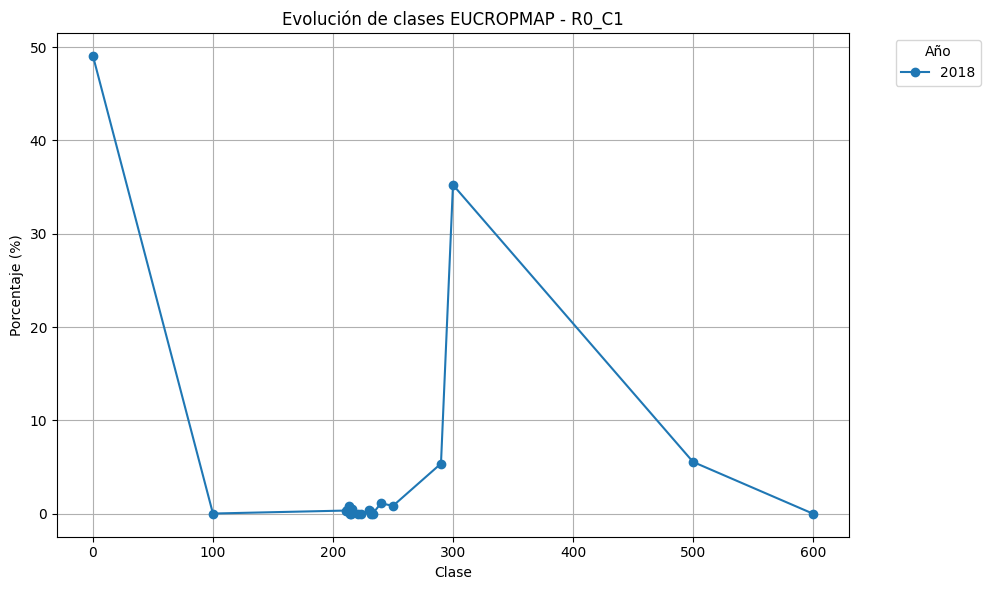

In [11]:
# Elegir una celda para analizar (por ejemplo 'R0_C0')
celda_objetivo = 'R0_C1'

# Comprobar si la celda está disponible
if celda_objetivo in pivot_tiempo.index.get_level_values('celda'):
    pivot_tiempo.loc[celda_objetivo].T.plot(figsize=(10, 6), marker='o')
    plt.title(f"Evolución de clases EUCROPMAP - {celda_objetivo}")
    plt.ylabel("Porcentaje (%)")
    plt.xlabel("Clase")
    plt.grid(True)
    plt.legend(title="Año", bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()
else:
    print(f"La celda {celda_objetivo} no está disponible en los datos.")


# MODELOS

Paso 1: Preparación del dataset

In [12]:
import numpy as np
import rasterio
import os
from glob import glob
from skimage.transform import resize

# Carpeta
# Configuración de directorios
IMAGENES_DIR = r"C:/Users/crome/Desktop/VIU/Code/Datos/AMB/images"
MASCARAS_DIR = r"C:/Users/crome/Desktop/VIU/Code/Datos/AMB/masks"

tif_files = sorted(glob("C:/Users/crome/Desktop/VIU/Code/Datos/AMB/*.tif"))
out_dir = "C:/Users/crome/Desktop/VIU/Code/Datos/AMB/npy_files/"

os.makedirs(IMAGENES_DIR, exist_ok=True)
os.makedirs(MASCARAS_DIR, exist_ok=True)


target_rgb_shape = (256, 256, 3)
target_mask_shape = (256, 256)

errores = []

for tif_path in tif_files:
    name = os.path.basename(tif_path).replace('.tif', '')

    try:
        with rasterio.open(tif_path) as src:
            img = src.read()

        rgb = np.stack([img[0], img[1], img[2]], axis=-1).astype(np.float32) / 10000.0
        mask = img[3].astype(np.uint8)

        # Redimensionar
        rgb = resize(rgb, target_rgb_shape, preserve_range=True, anti_aliasing=True)
        mask = resize(mask, target_mask_shape, order=0, preserve_range=True).astype(np.uint8)

        np.save(os.path.join(IMAGENES_DIR, f'{name}_rgb.npy'), rgb)
        np.save(os.path.join(MASCARAS_DIR, f'{name}_mask.npy'), mask)

    except Exception as e:
        print(f"Error procesando {name}: {e}")
        errores.append(name)

print("Conversión completada.")
if errores:
    print("Errores en archivos:", errores)


Conversión completada.


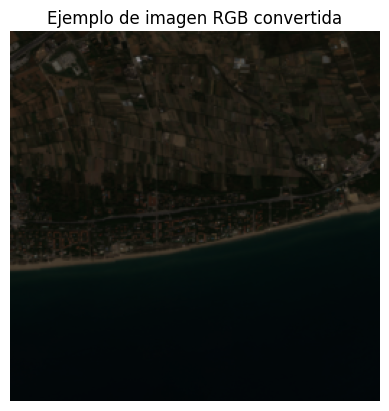

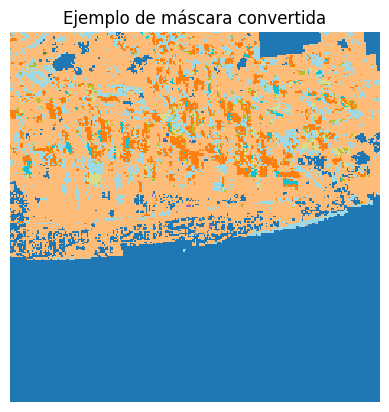

In [16]:
# Imprimir ejemplo de un archivo convertido
example_file = os.path.join(IMAGENES_DIR, 'AMB_R0_C1_2018_rgb.npy')
if os.path.exists(example_file):
    example_rgb = np.load(example_file)
    plt.imshow(example_rgb)
    plt.title('Ejemplo de imagen RGB convertida')
    plt.axis('off')
    plt.show()
# Imprimir ejemplo de una máscara convertida
example_mask_file = os.path.join(MASCARAS_DIR, 'AMB_R0_C1_2018_mask.npy')
if os.path.exists(example_mask_file):
    example_mask = np.load(example_mask_file)
    plt.imshow(example_mask, cmap='tab20', interpolation='none')
    plt.title('Ejemplo de máscara convertida')
    plt.axis('off')
    plt.show()

Paso 2: Definir arquitectura  U-Net en Keras

In [21]:
from tensorflow.keras import Input, Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Conv2DTranspose, concatenate
from tensorflow.keras.optimizers import Adam

def unet_model(input_size=(256, 256, 3), num_classes=10):
    inputs = Input(input_size)

    # Encoder
    c1 = Conv2D(32, (3,3), activation='relu', padding='same')(inputs)
    c1 = Conv2D(32, (3,3), activation='relu', padding='same')(c1)
    p1 = MaxPooling2D((2,2))(c1)

    c2 = Conv2D(64, (3,3), activation='relu', padding='same')(p1)
    c2 = Conv2D(64, (3,3), activation='relu', padding='same')(c2)
    p2 = MaxPooling2D((2,2))(c2)

    c3 = Conv2D(128, (3,3), activation='relu', padding='same')(p2)
    c3 = Conv2D(128, (3,3), activation='relu', padding='same')(c3)
    p3 = MaxPooling2D((2,2))(c3)

    # Bottleneck
    c4 = Conv2D(256, (3,3), activation='relu', padding='same')(p3)
    c4 = Conv2D(256, (3,3), activation='relu', padding='same')(c4)

    # Decoder
    u5 = Conv2DTranspose(128, (2,2), strides=(2,2), padding='same')(c4)
    u5 = concatenate([u5, c3])
    c5 = Conv2D(128, (3,3), activation='relu', padding='same')(u5)
    c5 = Conv2D(128, (3,3), activation='relu', padding='same')(c5)

    u6 = Conv2DTranspose(64, (2,2), strides=(2,2), padding='same')(c5)
    u6 = concatenate([u6, c2])
    c6 = Conv2D(64, (3,3), activation='relu', padding='same')(u6)
    c6 = Conv2D(64, (3,3), activation='relu', padding='same')(c6)

    u7 = Conv2DTranspose(32, (2,2), strides=(2,2), padding='same')(c6)
    u7 = concatenate([u7, c1])
    c7 = Conv2D(32, (3,3), activation='relu', padding='same')(u7)
    c7 = Conv2D(32, (3,3), activation='relu', padding='same')(c7)

    outputs = Conv2D(num_classes, (1,1), activation='softmax')(c7)

    model = Model(inputs=[inputs], outputs=[outputs])
    model.compile(optimizer=Adam(learning_rate=1e-4), loss='categorical_crossentropy', metrics=['accuracy'])

    return model


Paso 3: Preparación de los datos (X e y)

In [24]:
import numpy as np
import os
from glob import glob
from skimage.transform import resize

# Rutas
folder = "C:/Users/crome/Desktop/VIU/Code/Datos/AMB/unet/"
os.makedirs(folder, exist_ok=True)

rgb_files = sorted(glob(os.path.join(IMAGENES_DIR, '*_rgb.npy')))
mask_files = sorted(glob(os.path.join(MASCARAS_DIR, '*_mask.npy')))

X = []
y = []

# Tamaños estándar
target_rgb_shape = (256, 256, 3)
target_mask_shape = (256, 256)

for rgb_file, mask_file in zip(rgb_files, mask_files):
    # Cargar imagen RGB
    rgb = np.load(rgb_file).astype(np.float32)

    # Normalización automática
    max_val = rgb.max()
    if max_val > 1000:
        rgb /= 10000.0
    elif max_val > 1.1:
        rgb /= 255.0
    # Si ya está entre 0-1, no se hace nada

    # Cargar máscara
    mask = np.load(mask_file).astype(np.uint8)

    # Redimensionar si es necesario
    if rgb.shape != target_rgb_shape:
        rgb = resize(rgb, target_rgb_shape, preserve_range=True, anti_aliasing=True)
    if mask.shape != target_mask_shape:
        mask = resize(mask, target_mask_shape, preserve_range=True, order=0).astype(np.uint8)

    X.append(rgb)
    y.append(mask)

# Convertir a arrays finales
X = np.stack(X)
y = np.stack(y)

# Guardar
np.save(os.path.join(folder, 'X_AMB_2018.npy'), X)
np.save(os.path.join(folder, 'y_AMB_2018.npy'), y)

print("Datos combinados y guardados:")
print("X shape:", X.shape)
print("y shape:", y.shape)

Datos combinados y guardados:
X shape: (99, 256, 256, 3)
y shape: (99, 256, 256)


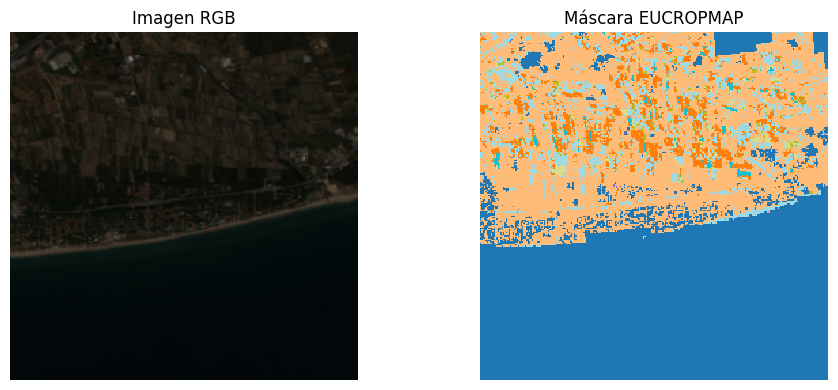

In [25]:
import matplotlib.pyplot as plt
import numpy as np
import os

# Ruta donde se han guardado
folder = "C:/Users/crome/Desktop/VIU/Code/Datos/AMB/unet/"

# Cargar arrays combinados
X = np.load(os.path.join(folder, 'X_AMB_2018.npy'))
y = np.load(os.path.join(folder, 'y_AMB_2018.npy'))

# Ver ejemplo (por ejemplo el primero)
i = 0  # índice de la imagen que quieres ver

plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.imshow(X[i])
plt.title('Imagen RGB')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(y[i], cmap='tab20', interpolation='none')
plt.title('Máscara EUCROPMAP')
plt.axis('off')

plt.tight_layout()
plt.show()


Paso 4: Cargar los datos y preparar el entorno

In [2]:
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

# Cargar datos
folder = "C:/Users/crome/Desktop/VIU/Code/Datos/AMB/unet/"
X = np.load(folder + 'X_AMB_2018.npy')
y = np.load(folder + 'y_AMB_2018.npy')

# Asegurar que esté en formato int
y = y.astype(np.int32)

# Crear un mapeo de etiquetas únicas a índices continuos
clases_unicas = np.unique(y)
clase_a_indice = {clase: idx for idx, clase in enumerate(clases_unicas)}
indice_a_clase = {idx: clase for clase, idx in clase_a_indice.items()} 

# Aplicar mapeo
y_reindex = np.vectorize(clase_a_indice.get)(y)

# Convertir a one-hot
n_classes = len(clases_unicas)
y_cat = tf.keras.utils.to_categorical(y_reindex, num_classes=n_classes)

# División
X_train, X_val, y_train, y_val = train_test_split(X, y_cat, test_size=0.2, random_state=42)

print("Clases mapeadas:", clase_a_indice)
print("X_train:", X_train.shape, "y_train:", y_train.shape)


Clases mapeadas: {0: 0, 34: 1, 44: 2, 88: 3, 100: 4, 211: 5, 212: 6, 213: 7, 215: 8, 216: 9, 221: 10, 223: 11, 230: 12, 231: 13, 232: 14, 240: 15, 244: 16, 250: 17}
X_train: (79, 256, 256, 3) y_train: (79, 256, 256, 18)


Paso 5: Entrenamiento del modelo

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

model = unet_model(input_size=(256, 256, 3), num_classes=n_classes)

# Callbacks
checkpoint = ModelCheckpoint("mejor_modelo.h5", monitor="val_loss", save_best_only=True)
early_stop = EarlyStopping(monitor="val_loss", patience=10, restore_best_weights=True)

history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    batch_size=8,
    epochs=100,
    callbacks=[checkpoint, early_stop]
)

Epoch 1/100
10/10 [==============================] - 29s 3s/step - loss: 2.8846 - accuracy: 0.3880 - val_loss: 2.8760 - val_accuracy: 0.5786
Epoch 2/100
10/10 [==============================] - 27s 3s/step - loss: 2.8710 - accuracy: 0.5461 - val_loss: 2.8556 - val_accuracy: 0.4463
Epoch 3/100
10/10 [==============================] - 28s 3s/step - loss: 2.8394 - accuracy: 0.4901 - val_loss: 2.7793 - val_accuracy: 0.4675
Epoch 4/100
10/10 [==============================] - 26s 3s/step - loss: 2.5579 - accuracy: 0.5000 - val_loss: 1.7456 - val_accuracy: 0.4666
Epoch 5/100
10/10 [==============================] - 25s 3s/step - loss: 1.4529 - accuracy: 0.4702 - val_loss: 1.5070 - val_accuracy: 0.4585
Epoch 6/100
10/10 [==============================] - 25s 3s/step - loss: 1.1854 - accuracy: 0.4596 - val_loss: 1.2860 - val_accuracy: 0.4681
Epoch 7/100
10/10 [==============================] - 25s 3s/step - loss: 1.1460 - accuracy: 0.5008 - val_loss: 1.2841 - val_accuracy: 0.4677
Epoch 8/100
1

In [ ]:
# Guardar el modelo final
model.save("modelo_final.h5")

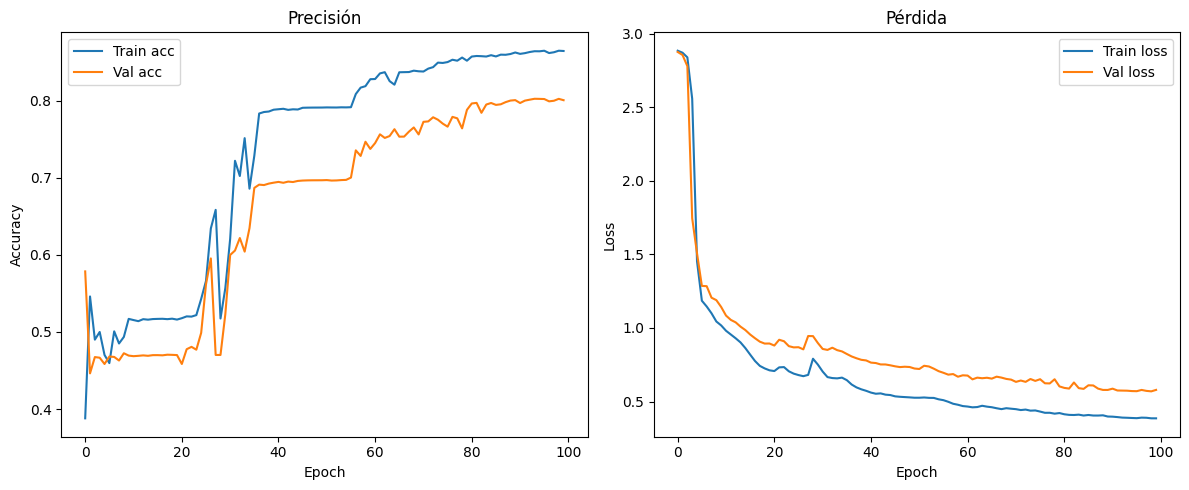

In [40]:
# Gráfica de accuracy y loss
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train acc')
plt.plot(history.history['val_accuracy'], label='Val acc')
plt.title('Precisión')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train loss')
plt.plot(history.history['val_loss'], label='Val loss')
plt.title('Pérdida')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


Paso 4: Visualización de predicciones

In [3]:
# Cargar el mejor modelo
from tensorflow.keras.models import load_model
model = load_model("mejor_modelo.h5")

# Evaluación del Mejor Modelo
loss, accuracy = model.evaluate(X_val, y_val)
print(f"Pérdida en validación: {loss:.4f}")
print(f"Precisión en validación: {accuracy:.4f}")


1/1 [==============================] - 3s 3s/step - loss: 0.5692 - accuracy: 0.8025
Pérdida en validación: 0.5692
Precisión en validación: 0.8025
1/1 [==============================] - 3s 3s/step - loss: 0.5692 - accuracy: 0.8025
Pérdida en validación: 0.5692
Precisión en validación: 0.8025


In [6]:
import numpy as np
from sklearn.metrics import confusion_matrix

def calcular_metricas_segmentacion(y_true, y_pred, n_clases):
    """
    Calcula métricas de segmentación (IoU, Dice y Accuracy) por clase.

    y_true: (N, H, W) ground truth, valores enteros por píxel
    y_pred: (N, H, W) predicción del modelo, valores enteros por píxel
    n_clases: número total de clases (de 0 a n_clases-1)
    """
    assert y_true.shape == y_pred.shape, "Tamaño inconsistente"

    iou_list = []
    dice_list = []
    accuracy_list = []

    print(f"{'Clase':<8} {'IoU':>10} {'Dice':>10} {'Accuracy':>10}")
    print("-" * 40)

    for clase in range(n_clases):
        gt = (y_true == clase)
        pred = (y_pred == clase)

        intersection = np.logical_and(gt, pred).sum()
        union = np.logical_or(gt, pred).sum()
        total_pred = pred.sum()
        total_gt = gt.sum()

        iou = intersection / union if union != 0 else 0.0
        dice = 2 * intersection / (total_pred + total_gt) if (total_pred + total_gt) != 0 else 0.0
        accuracy = intersection / total_gt if total_gt != 0 else 0.0

        iou_list.append(iou)
        dice_list.append(dice)
        accuracy_list.append(accuracy)

        print(f"{clase:<8} {iou:10.4f} {dice:10.4f} {accuracy:10.4f}")

    print("-" * 40)
    print(f"{'PROMEDIO':<8} {np.mean(iou_list):10.4f} {np.mean(dice_list):10.4f} {np.mean(accuracy_list):10.4f}")
    return iou_list, dice_list, accuracy_list


y_val_int = np.argmax(y_val, axis=-1)
y_pred_raw = model.predict(X_val)
y_pred_int = np.argmax(y_pred_raw, axis=-1)
n_clases = len(np.unique(y_val_int))

iou, dice, acc = calcular_metricas_segmentacion(y_val_int, y_pred_int, n_clases)

1/1 [==============================] - 2s 2s/step
Clase           IoU       Dice   Accuracy
----------------------------------------
0            0.7587     0.8628     0.8690
1            0.0000     0.0000     0.0000
2            0.6755     0.8063     0.8676
3            0.0000     0.0000     0.0000
4            0.0000     0.0000     0.0000
5            0.0000     0.0000     0.0000
6            0.0000     0.0000     0.0000
7            0.0000     0.0000     0.0000
8            0.0000     0.0000     0.0000
9            0.0000     0.0000     0.0000
10           0.0000     0.0000     0.0000
11           0.0000     0.0000     0.0000
12           0.0000     0.0000     0.0000
13           0.0000     0.0000     0.0000
14           0.0000     0.0000     0.0000
15           0.0000     0.0000     0.0000
16           0.0000     0.0000     0.0000
17           0.0000     0.0000     0.0000
----------------------------------------
PROMEDIO     0.0797     0.0927     0.0965


1/1 [==============================] - 0s 248ms/step


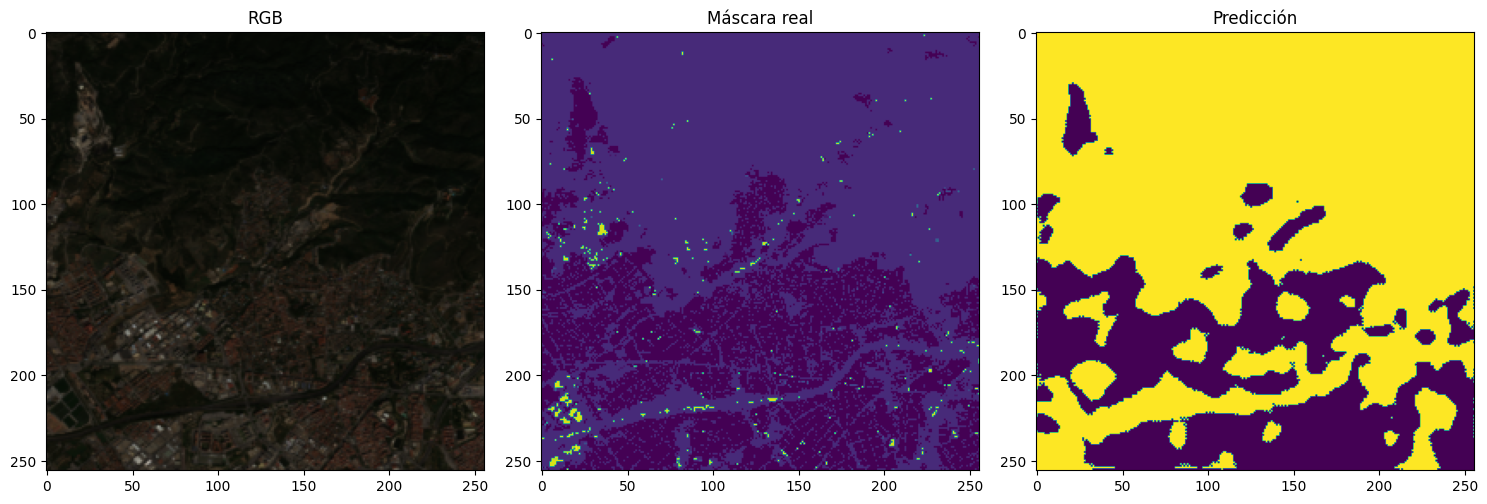

In [25]:
# Predicción sobre una imagen del conjunto de validación
i = 10
pred_mask = model.predict(np.expand_dims(X_val[i], axis=0))[0]
pred_mask_argmax = np.argmax(pred_mask, axis=-1)

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15,5))
ax1.imshow(X_val[i])
ax1.set_title("RGB")
ax2.imshow(np.argmax(y_val[i], axis=-1))
ax2.set_title("Máscara real")
ax3.imshow(pred_mask_argmax)
ax3.set_title("Predicción")
plt.tight_layout()
plt.show()

1/1 [==============================] - 0s 132ms/step


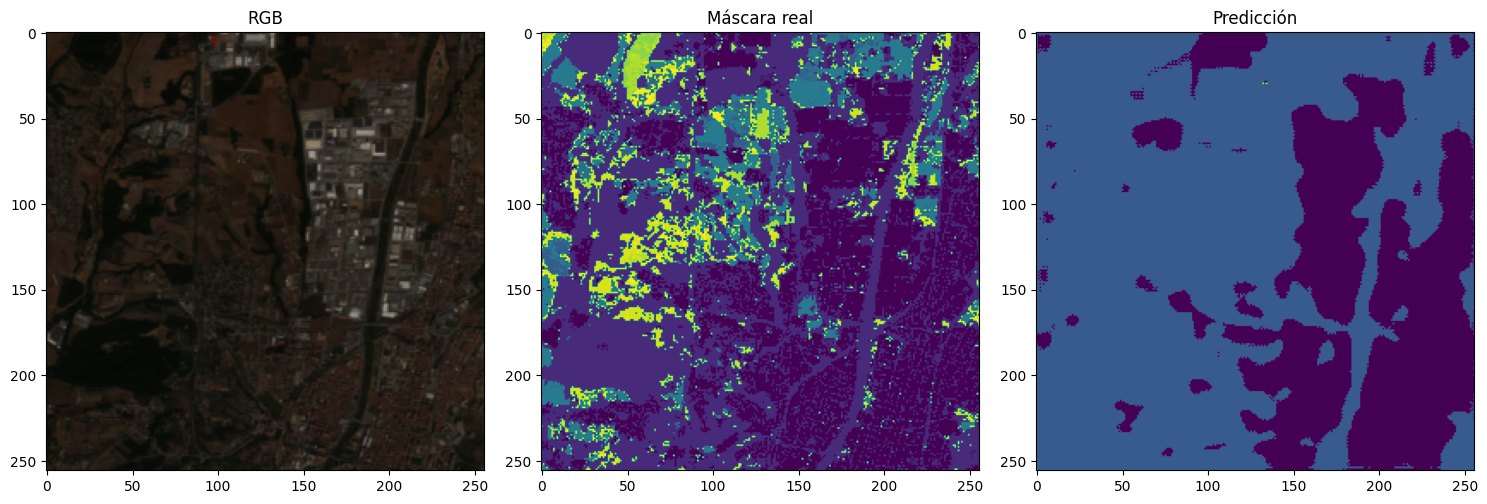

In [26]:
# Predicción sobre una imagen del conjunto de validación
i = 2
pred_mask = model.predict(np.expand_dims(X_val[i], axis=0))[0]
pred_mask_argmax = np.argmax(pred_mask, axis=-1)

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15,5))
ax1.imshow(X_val[i])
ax1.set_title("RGB")
ax2.imshow(np.argmax(y_val[i], axis=-1))
ax2.set_title("Máscara real")
ax3.imshow(pred_mask_argmax)
ax3.set_title("Predicción")
plt.tight_layout()
plt.show()

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras import backend as K
import pandas as pd
import os
import gc


batch_sizes = [8, 16, 32]
epoch_list = [25, 50, 100]

resultados = []

for batch in batch_sizes:
    for epochs in epoch_list:
        print(f"\n Entrenando con batch_size={batch}, epochs={epochs}")
        
        # Liberar memoria previa
        K.clear_session()
        gc.collect()

        # Crear nuevo modelo desde cero
        model = unet_model(input_size=(256, 256, 3), num_classes=n_classes)
        
        # Callbacks
        nombre_modelo = f"model_bs{batch}_ep{epochs}.h5"
        checkpoint = ModelCheckpoint(nombre_modelo, monitor="val_loss", save_best_only=True, verbose=0)
        early_stop = EarlyStopping(monitor="val_loss", patience=10, restore_best_weights=True, verbose=0)

        history = model.fit(
            X_train, y_train,
            validation_data=(X_val, y_val),
            batch_size=batch,
            epochs=epochs,
            callbacks=[checkpoint, early_stop],
            verbose=1
        )

        best_epoch = np.argmin(history.history['val_loss']) + 1
        final_val_loss = np.min(history.history['val_loss'])
        final_val_acc = history.history['val_accuracy'][best_epoch - 1]

        resultados.append({
            'batch_size': batch,
            'epochs': epochs,
            'best_epoch': best_epoch,
            'val_loss': round(final_val_loss, 4),
            'val_accuracy': round(final_val_acc, 4),
            'modelo': nombre_modelo
        })

# Mostrar resultados en tabla ordenada
df_resultados = pd.DataFrame(resultados)
df_resultados = df_resultados.sort_values(by='val_loss')
print("\n Resultados ordenados por menor pérdida en validación:\n")
print(df_resultados)

Código para evaluar cambio de suelo

1/1 [==============================] - 0s 97ms/step


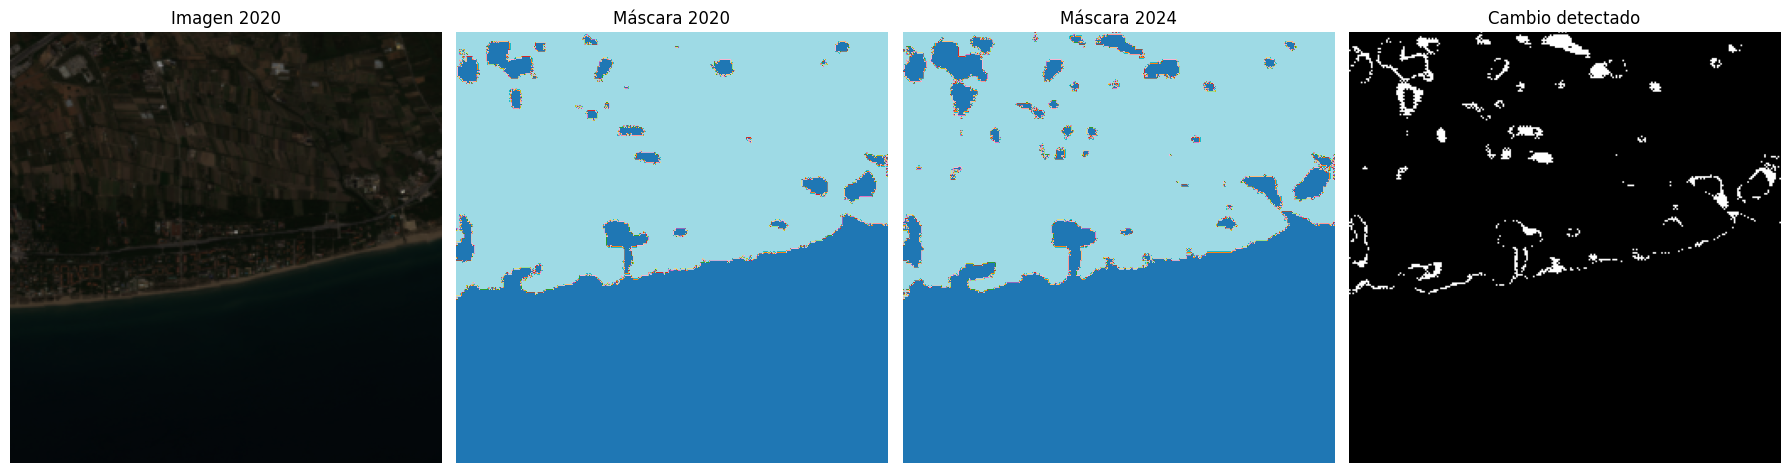

Porcentaje de píxeles cambiados: 3.04%


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model

# Cargar modelo entrenado
model = load_model("mejor_modelo.h5")

# Función para predecir la máscara
def predict_mask(img):
    pred = model.predict(np.expand_dims(img, axis=0))[0]
    return np.argmax(pred, axis=-1)

# Cargar dos imágenes de la misma zona (fechas distintas)
img_2020 = np.load("C:/Users/crome/Desktop/VIU/Code/Datos/AMB_TEMP/images/AMB_R0_C1_2020_rgb.npy")
img_2023 = np.load("C:/Users/crome/Desktop/VIU/Code/Datos/AMB_TEMP/images/AMB_R0_C1_2024_rgb.npy")

# Normalizar si no están ya
if img_2020.max() > 1: img_2020 = img_2020 / 10000.0
if img_2023.max() > 1: img_2023 = img_2023 / 10000.0

# Predecir
pred_2020 = predict_mask(img_2020)
pred_2023 = predict_mask(img_2023)

# Mapa de cambio
cambio = pred_2020 != pred_2023

# Visualización
fig, axs = plt.subplots(1, 4, figsize=(18, 5))
axs[0].imshow(img_2020)
axs[0].set_title("Imagen 2020")
axs[1].imshow(pred_2020, cmap="tab20")
axs[1].set_title("Máscara 2020")
axs[2].imshow(pred_2023, cmap="tab20")
axs[2].set_title("Máscara 2024")
axs[3].imshow(cambio, cmap='gray')
axs[3].set_title("Cambio detectado")
for ax in axs: ax.axis('off')
plt.tight_layout()
plt.show()

# Estadística
n_cambiados = np.sum(cambio)
total = cambio.size
print(f"Porcentaje de píxeles cambiados: {100 * n_cambiados / total:.2f}%")


In [34]:
clase_eucropmap = {
    0:  "Sin información / fondo",
    34: "Cereal – Trigo (soft wheat)",
    44: "Cereal – Cebada (barley)",
    88: "Cereal – Maíz (corn)",
    100: "Cereal – Otros cereales",
    211: "Leguminosas – Guisante (pea)",
    212: "Leguminosas – Alfalfa",
    213: "Leguminosas – Otros",
    215: "Tubérculos – Patata (potato)",
    216: "Tubérculos – Remolacha",
    221: "Forraje – Praderas/perennes",
    223: "Forraje – Cultivos de corte",
    230: "Aceite – Colza (rapeseed)",
    231: "Aceite – Girasol",
    232: "Aceite – Otros oleaginosos",
    240: "Huerto/Frutales – Viñedo",
    244: "Huerto/Frutales – Frutales de pepita/drupe",
    250: "Otros – Superficies no agrícolas"
}

import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

def evaluar_segmentacion(y_true, y_pred, n_clases, clase_a_nombre=None):
    """
    Evalúa la segmentación comparando máscaras reales y predichas.
    Muestra IoU por clase, precisión por clase y visualizaciones.
    
    Args:
        y_true: np.array (H, W) máscara real (valores de 0 a n_clases-1)
        y_pred: np.array (H, W) predicción (valores de 0 a n_clases-1)
        n_clases: número total de clases
        clase_a_nombre: dict opcional para mapear índice a nombre
    """

    iou_por_clase = []
    precision_por_clase = []

    print("Métricas por clase:")
    print("-" * 30)

    for clase in range(n_clases):
        interseccion = np.logical_and(y_true == clase, y_pred == clase).sum()
        union = np.logical_or(y_true == clase, y_pred == clase).sum()
        total_pred = (y_pred == clase).sum()

        iou = interseccion / union if union != 0 else 0.0
        precision = interseccion / total_pred if total_pred != 0 else 0.0

        iou_por_clase.append(iou)
        precision_por_clase.append(precision)

        nombre = clase_a_nombre.get(clase, str(clase)) if clase_a_nombre else str(clase)
        print(f"Clase {nombre}: IoU = {iou:.3f}, Precisión = {precision:.3f}")

    # Visualización por clase
    fig, axs = plt.subplots(n_clases, 3, figsize=(10, 4 * n_clases))

    for clase in range(n_clases):
        nombre = clase_a_nombre.get(clase, f"Clase {clase}") if clase_a_nombre else f"Clase {clase}"

        axs[clase, 0].imshow(y_true == clase, cmap='gray')
        axs[clase, 0].set_title(f"Máscara real - {nombre}")

        axs[clase, 1].imshow(y_pred == clase, cmap='gray')
        axs[clase, 1].set_title(f"Predicción - {nombre}")

        axs[clase, 2].imshow(np.logical_and(y_true == clase, y_pred == clase), cmap='Greens')
        axs[clase, 2].set_title(f"Aciertos - {nombre}")

        for j in range(3):
            axs[clase, j].axis('off')

    plt.tight_layout()
    plt.show()

    return iou_por_clase, precision_por_clase


# YOLO

In [53]:
import rasterio
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import os

folder = "C:/Users/crome/Desktop/VIU/Code/Datos/AMB/"
output_folder = os.path.join(folder, "rgb_yolo")
os.makedirs(output_folder, exist_ok=True)

for tif_file in sorted(glob(os.path.join(folder, 'AMB_*.tif'))):
    with rasterio.open(tif_file) as src:
        img = src.read([1, 2, 3])  # B4, B3, B2 (ajustar si es Sentinel)
        img = np.clip(img, 0, 10000) / 10000.0
        img = (img.transpose(1, 2, 0) * 255).astype(np.uint8)

        name = os.path.basename(tif_file).replace('.tif', '.jpg')
        Image.fromarray(img).save(os.path.join(output_folder, name))


In [1]:
import os
import xml.etree.ElementTree as ET
import json

# Carpeta base
CARPETA = r"C:\Users\crome\Desktop\VIU\Code\Datos\AMB\rgb_yolo"

def convertir_xml_a_json(path_xml):
    tree = ET.parse(path_xml)
    root = tree.getroot()

    filename = root.find("filename").text
    size = root.find("size")
    width = int(size.find("width").text)
    height = int(size.find("height").text)

    anotaciones = []
    for obj in root.findall("object"):
        label = obj.find("name").text
        bndbox = obj.find("bndbox")
        xmin = int(bndbox.find("xmin").text)
        ymin = int(bndbox.find("ymin").text)
        xmax = int(bndbox.find("xmax").text)
        ymax = int(bndbox.find("ymax").text)

        # Coordenadas centradas (como tus otros JSON)
        x_center = (xmin + xmax) / 2
        y_center = (ymin + ymax) / 2
        width_box = xmax - xmin
        height_box = ymax - ymin

        anotaciones.append({
            "label": label,
            "coordinates": {
                "x": x_center,
                "y": y_center,
                "width": width_box,
                "height": height_box
            }
        })

    json_data = [{
        "image": filename,
        "verified": False,
        "annotations": anotaciones
    }]

    # Guardar como .json
    json_path = os.path.splitext(path_xml)[0] + ".json"
    with open(json_path, "w") as f:
        json.dump(json_data, f, indent=4)

    # Eliminar el XML original
    os.remove(path_xml)
    print(f"Convertido y eliminado: {os.path.basename(path_xml)}")

# Recorre carpeta y convierte todos los .xml
for archivo in os.listdir(CARPETA):
    if archivo.endswith(".xml"):
        convertir_xml_a_json(os.path.join(CARPETA, archivo))

print("Conversión completa.")


Convertido y eliminado: AMB_R0_C1_2018.xml
Convertido y eliminado: AMB_R0_C2_2018.xml
Convertido y eliminado: AMB_R0_C3_2018.xml
Convertido y eliminado: AMB_R1_C0_2018.xml
Convertido y eliminado: AMB_R1_C1_2018.xml
Convertido y eliminado: AMB_R1_C2_2018.xml
Convertido y eliminado: AMB_R1_C3_2018.xml
Convertido y eliminado: AMB_R1_C4_2018.xml
Convertido y eliminado: AMB_R2_C0_2018.xml
Convertido y eliminado: AMB_R2_C1_2018.xml
Convertido y eliminado: AMB_R2_C2_2018.xml
Convertido y eliminado: AMB_R2_C3_2018.xml
Convertido y eliminado: AMB_R2_C4_2018.xml
Convertido y eliminado: AMB_R3_C0_2018.xml
Convertido y eliminado: AMB_R3_C1_2018.xml
Convertido y eliminado: AMB_R3_C2_2018.xml
Convertido y eliminado: AMB_R3_C3_2018.xml
Convertido y eliminado: AMB_R3_C4_2018.xml
Convertido y eliminado: AMB_R3_C5_2018.xml
Convertido y eliminado: AMB_R4_C0_2018.xml
Convertido y eliminado: AMB_R4_C1_2018.xml
Convertido y eliminado: AMB_R4_C2_2018.xml
Convertido y eliminado: AMB_R4_C3_2018.xml
Convertido 

In [35]:
import os
import json
from collections import Counter

# Ruta a la carpeta donde están los .json
CARPETA = r"C:\Users\crome\Desktop\VIU\Code\Datos\AMB\rgb_yolo"

# Contador para las clases
clases = Counter()

# Recorrer todos los archivos .json
for archivo in os.listdir(CARPETA):
    if archivo.endswith(".json"):
        ruta = os.path.join(CARPETA, archivo)
        try:
            with open(ruta, 'r') as f:
                data = json.load(f)
                if not data or "annotations" not in data[0]:
                    continue

                for ann in data[0]["annotations"]:
                    label = ann["label"]
                    clases[label] += 1
        except Exception as e:
            print(f"Error procesando {archivo}: {e}")

# Mostrar resultados
print("\nClases encontradas:")
for clase in sorted(clases):
    print(f"- {clase}: {clases[clase]} anotaciones")

print(f"\nTotal de clases distintas: {len(clases)}")



Clases encontradas:
- Agricola: 50 anotaciones
- Industria: 118 anotaciones
- Poblacion: 151 anotaciones

Total de clases distintas: 3


In [3]:
import os
import xml.etree.ElementTree as ET
import json
from PIL import Image

# Ruta base
base_dir = r"C:\Users\crome\Desktop\VIU\Code\Datos\AMB\rgb_yolo"
output_dir = r"C:\Users\crome\Desktop\VIU\Code\Datos\AMB\rgb_yolo\txt"

import os
import json

# Ruta de los .json
CARPETA_JSON = r"C:\Users\crome\Desktop\VIU\Code\Datos\AMB\rgb_yolo"

# Conjunto para clases únicas
clases_unicas = set()

# Buscar todas las clases en los .json
for archivo in os.listdir(CARPETA_JSON):
    if archivo.endswith(".json"):
        try:
            with open(os.path.join(CARPETA_JSON, archivo), "r") as f:
                data = json.load(f)
                if not data or "annotations" not in data[0]:
                    continue

                for ann in data[0]["annotations"]:
                    label = ann["label"].strip()
                    clases_unicas.add(label)
        except Exception as e:
            print(f"Error leyendo {archivo}: {e}")

# Ordenar alfabéticamente (opcional) o por aparición
clases_ordenadas = sorted(clases_unicas)  # usa list(clases_unicas) para orden por aparición

# Crear diccionario clase → ID
clase_a_id = {clase: idx for idx, clase in enumerate(clases_ordenadas)}

# Mostrar resultado
print("Diccionario generado:\n")
print("clase_a_id = {")
for k, v in clase_a_id.items():
    print(f"    \"{k}\": {v},")
print("}")

# Función para convertir XML (PASCAL VOC)
def convertir_xml(xml_path):
    img_path = xml_path.replace(".xml", ".jpg")
    txt_path = xml_path.replace(".xml", ".txt")

    if not os.path.exists(img_path):
        print(f"Imagen no encontrada para {xml_path}")
        return

    img = Image.open(img_path)
    w, h = img.size

    tree = ET.parse(xml_path)
    root = tree.getroot()

    yolo_lines = []
    for obj in root.findall("object"):
        label = obj.find("name").text
        if label not in clase_a_id:
            continue
        clase = clase_a_id[label]

        bndbox = obj.find("bndbox")
        xmin = int(bndbox.find("xmin").text)
        ymin = int(bndbox.find("ymin").text)
        xmax = int(bndbox.find("xmax").text)
        ymax = int(bndbox.find("ymax").text)

        x_center = (xmin + xmax) / 2 / w
        y_center = (ymin + ymax) / 2 / h
        box_width = (xmax - xmin) / w
        box_height = (ymax - ymin) / h

        yolo_lines.append(f"{clase} {x_center:.6f} {y_center:.6f} {box_width:.6f} {box_height:.6f}")

    with open(txt_path, "w") as f:
        f.write("\n".join(yolo_lines))
    print(f"Convertido XML: {os.path.basename(txt_path)}")

# Función para convertir JSON
def convertir_json(json_path):
    img_path = json_path.replace(".json", ".jpg")
    txt_path = json_path.replace(".json", ".txt")

    if not os.path.exists(img_path):
        print(f"Imagen no encontrada para {json_path}")
        return

    img = Image.open(img_path)
    w, h = img.size

    with open(json_path, "r") as f:
        data = json.load(f)

    yolo_lines = []
    for ann in data[0].get("annotations", []):
        label = ann["label"]
        if label not in clase_a_id:
            continue
        clase = clase_a_id[label]

        coords = ann["coordinates"]
        x_center = coords["x"] / w
        y_center = coords["y"] / h
        width = coords["width"] / w
        height = coords["height"] / h

        yolo_lines.append(f"{clase} {x_center:.6f} {y_center:.6f} {width:.6f} {height:.6f}")

    with open(txt_path, "w") as f:
        f.write("\n".join(yolo_lines))
    print(f"Convertido JSON: {os.path.basename(txt_path)}")

# Recorremos todos los archivos de la carpeta
for file in os.listdir(base_dir):
    full_path = os.path.join(base_dir, file)

    if file.endswith(".xml"):
        convertir_xml(full_path)
    elif file.endswith(".json"):
        convertir_json(full_path)

print("Conversión completa.")



Diccionario generado:

clase_a_id = {
    "Agricola": 0,
    "Industria": 1,
    "Poblacion": 2,
}
Convertido JSON: AMB_R0_C1_2018.txt
Convertido JSON: AMB_R0_C2_2018.txt
Convertido JSON: AMB_R0_C3_2018.txt
Convertido JSON: AMB_R1_C0_2018.txt
Convertido JSON: AMB_R1_C1_2018.txt
Convertido JSON: AMB_R1_C2_2018.txt
Convertido JSON: AMB_R1_C3_2018.txt
Convertido JSON: AMB_R1_C4_2018.txt
Convertido JSON: AMB_R2_C0_2018.txt
Convertido JSON: AMB_R2_C1_2018.txt
Convertido JSON: AMB_R2_C2_2018.txt
Convertido JSON: AMB_R2_C3_2018.txt
Convertido JSON: AMB_R2_C4_2018.txt
Convertido JSON: AMB_R3_C0_2018.txt
Convertido JSON: AMB_R3_C1_2018.txt
Convertido JSON: AMB_R3_C2_2018.txt
Convertido JSON: AMB_R3_C3_2018.txt
Convertido JSON: AMB_R3_C4_2018.txt
Convertido JSON: AMB_R3_C5_2018.txt
Convertido JSON: AMB_R4_C0_2018.txt
Convertido JSON: AMB_R4_C1_2018.txt
Convertido JSON: AMB_R4_C2_2018.txt
Convertido JSON: AMB_R4_C3_2018.txt
Convertido JSON: AMB_R4_C4_2018.txt
Convertido JSON: AMB_R4_C5_2018.txt
C

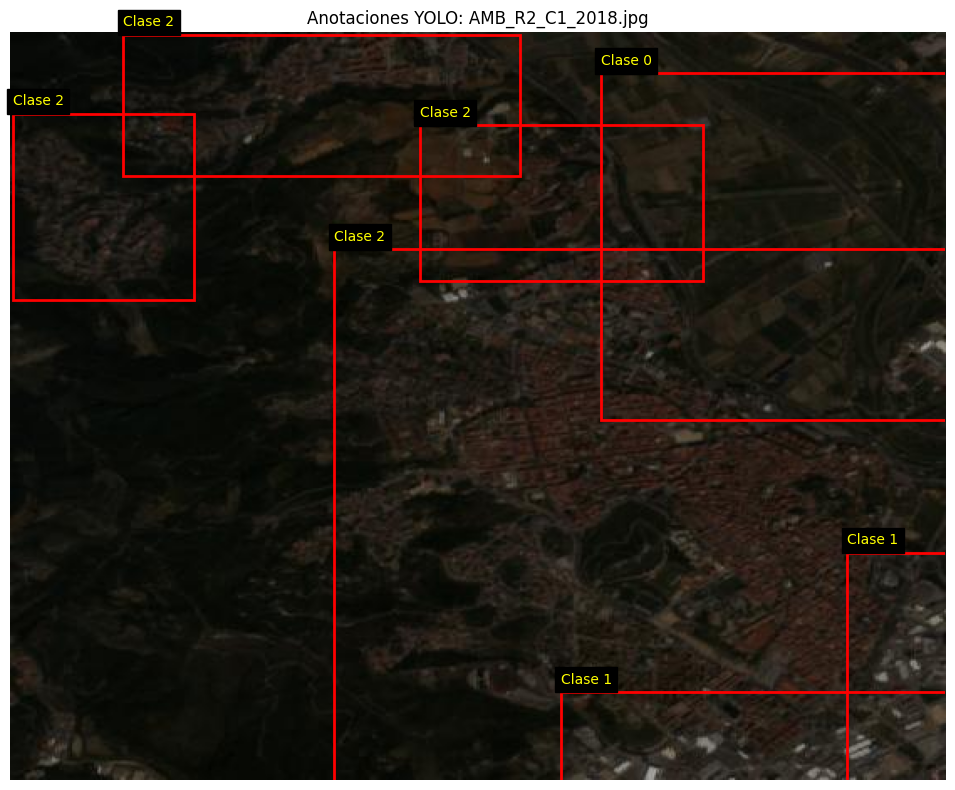

In [4]:
import os
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image

# Ruta base
IMG_NAME = "AMB_R2_C1_2018.jpg"  # Cambia por el que quieras
IMG_DIR = r"C:\Users\crome\Desktop\VIU\Code\Datos\AMB\rgb_yolo"
TXT_DIR = IMG_DIR  # Si los .txt están en el mismo sitio

# Leer imagen
img_path = os.path.join(IMG_DIR, IMG_NAME)
img = Image.open(img_path)
w, h = img.size

# Leer anotaciones YOLO
txt_name = os.path.splitext(IMG_NAME)[0] + ".txt"
txt_path = os.path.join(TXT_DIR, txt_name)

boxes = []
with open(txt_path, "r") as f:
    for line in f:
        clase_id, x, y, w_box, h_box = map(float, line.strip().split())
        boxes.append((clase_id, x, y, w_box, h_box))

# Mostrar imagen
fig, ax = plt.subplots(1, figsize=(10, 8))
ax.imshow(img)

# Dibujar cada caja
for clase_id, x, y, w_box, h_box in boxes:
    # Convertir a coordenadas absolutas
    x_abs = (x - w_box / 2) * w
    y_abs = (y - h_box / 2) * h
    width = w_box * w
    height = h_box * h

    rect = patches.Rectangle(
        (x_abs, y_abs),
        width,
        height,
        linewidth=2,
        edgecolor='red',
        facecolor='none'
    )
    ax.add_patch(rect)
    ax.text(x_abs, y_abs - 5, f"Clase {int(clase_id)}", color='yellow', fontsize=10, backgroundcolor='black')

ax.set_title(f"Anotaciones YOLO: {IMG_NAME}")
plt.axis('off')
plt.tight_layout()
plt.show()


In [6]:
import os
import shutil
import random

def dividir_desde_raiz(carpeta_raiz, carpeta_train, carpeta_val, val_ratio=0.2):
    # Crear carpetas destino
    for base in [carpeta_train, carpeta_val]:
        os.makedirs(os.path.join(base, "images"), exist_ok=True)
        os.makedirs(os.path.join(base, "labels"), exist_ok=True)

    # Buscar imágenes con .txt
    archivos = os.listdir(carpeta_raiz)
    imagenes = [
        f for f in archivos
        if f.lower().endswith((".jpg", ".jpeg", ".png"))
        and os.path.exists(os.path.join(carpeta_raiz, f.rsplit(".", 1)[0] + ".txt"))
    ]

    print(f"Encontradas {len(imagenes)} imágenes con sus .txt")

    random.shuffle(imagenes)
    val_size = int(len(imagenes) * val_ratio)

    for i, img in enumerate(imagenes):
        base_name = os.path.splitext(img)[0]
        label_file = base_name + ".txt"

        destino = carpeta_val if i < val_size else carpeta_train

        # Copiar imagen
        shutil.copy(os.path.join(carpeta_raiz, img), os.path.join(destino, "images", img))

        # Copiar etiqueta
        shutil.copy(os.path.join(carpeta_raiz, label_file), os.path.join(destino, "labels", label_file))

    print(f"Dataset dividido: {len(imagenes) - val_size} entrenamiento, {val_size} validación")

# 📂 Carpetas
CARPETA_RAIZ = r"C:\Users\crome\Desktop\VIU\Code\Datos\AMB\rgb_yolo"
CARPETA_TRAIN = os.path.join(CARPETA_RAIZ, "train")
CARPETA_VAL = os.path.join(CARPETA_RAIZ, "val")

# Ejecutar
dividir_desde_raiz(CARPETA_RAIZ, CARPETA_TRAIN, CARPETA_VAL)


Encontradas 68 imágenes con sus .txt
Dataset dividido: 55 entrenamiento, 13 validación


In [2]:
import os
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"
from ultralytics import YOLO

def entrenar_yolo(data_path, modelo_salida, epochs=1000, img_size=640):
    """
    Entrena un modelo YOLOv8 con el dataset proporcionado.
    """
    modelo = YOLO("yolov8n.pt")
    modelo.train(
        data=data_path,
        epochs=epochs,
        imgsz=img_size,
        save_period=10,
        project=os.path.dirname(modelo_salida),
        name=os.path.basename(modelo_salida).split('.')[0]
    )

DATA_PATH = r"data_other_pc.yaml"
MODELO_SALIDA = r"yolov8_model.pt"
entrenar_yolo(DATA_PATH, MODELO_SALIDA,100)


New https://pypi.org/project/ultralytics/8.3.155 available  Update with 'pip install -U ultralytics'
Ultralytics 8.3.39  Python-3.10.4 torch-2.1.0+cpu CPU (Intel Core(TM) i7-10750H 2.60GHz)
engine\trainer: task=detect, mode=train, model=yolov8n.pt, data=data_other_pc.yaml, epochs=100, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=10, cache=False, device=None, workers=8, project=, name=yolov8_model9, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_fra

train: Scanning C:\Users\crome\Desktop\VIU\Code\Datos\AMB\rgb_yolo\train\labels.cache... 55 images, 2 backgrounds, 0 corrupt: 100%|██████████| 55/55 [00:00<?, ?it/s]
val: Scanning C:\Users\crome\Desktop\VIU\Code\Datos\AMB\rgb_yolo\val\labels.cache... 13 images, 0 backgrounds, 0 corrupt: 100%|██████████| 13/13 [00:00<?, ?it/s]


Plotting labels to runs\detect\yolov8_model9\labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001429, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added 
Image sizes 640 train, 640 val
Using 0 dataloader workers
Logging results to runs\detect\yolov8_model9
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/100         0G      2.314      3.523       2.31         55        640: 100%|██████████| 4/4 [00:14<00:00,  3.60s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.62s/it]

                   all         13         53    0.00951      0.663     0.0405     0.0179



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/100         0G      2.084      3.434      2.162         68        640: 100%|██████████| 4/4 [00:13<00:00,  3.44s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.40s/it]

                   all         13         53    0.00982      0.674     0.0546      0.022



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/100         0G      1.942      3.359      2.061         60        640: 100%|██████████| 4/4 [00:13<00:00,  3.33s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.44s/it]

                   all         13         53    0.00905      0.618     0.0819     0.0333



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/100         0G      1.938      3.296      2.033         75        640: 100%|██████████| 4/4 [00:13<00:00,  3.36s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.25s/it]

                   all         13         53    0.00959      0.679     0.0946     0.0394



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/100         0G      1.948      3.123      2.057         51        640: 100%|██████████| 4/4 [00:13<00:00,  3.32s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.20s/it]

                   all         13         53     0.0102      0.709      0.126     0.0473



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/100         0G      1.817      2.954      1.977         66        640: 100%|██████████| 4/4 [00:13<00:00,  3.26s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.29s/it]

                   all         13         53    0.00949      0.648      0.115     0.0413



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/100         0G      1.831      2.934      1.956         67        640: 100%|██████████| 4/4 [00:13<00:00,  3.29s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.26s/it]

                   all         13         53    0.00953      0.629      0.094     0.0325



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/100         0G      1.896      2.779      1.978         72        640: 100%|██████████| 4/4 [00:13<00:00,  3.32s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.12s/it]

                   all         13         53     0.0094      0.627      0.116     0.0352



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/100         0G      1.779       2.69      1.898         67        640: 100%|██████████| 4/4 [00:13<00:00,  3.27s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.17s/it]

                   all         13         53      0.721     0.0533      0.124      0.042



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/100         0G      1.812      2.556       1.91         56        640: 100%|██████████| 4/4 [00:13<00:00,  3.45s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.13s/it]

                   all         13         53      0.729     0.0933     0.0674     0.0204



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/100         0G      1.756      2.584      1.895         86        640: 100%|██████████| 4/4 [00:13<00:00,  3.41s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.12s/it]

                   all         13         53      0.529      0.136      0.122     0.0382



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/100         0G      1.765      2.449      1.893         64        640: 100%|██████████| 4/4 [00:13<00:00,  3.33s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.12s/it]

                   all         13         53      0.541      0.138      0.136     0.0404



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/100         0G       1.78      2.389      1.836         70        640: 100%|██████████| 4/4 [00:13<00:00,  3.33s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.12s/it]

                   all         13         53      0.462      0.199      0.127     0.0435



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/100         0G      1.848      2.494      1.917         48        640: 100%|██████████| 4/4 [00:13<00:00,  3.26s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.13s/it]

                   all         13         53      0.486      0.232       0.12     0.0435



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/100         0G      1.708      2.334      1.795         44        640: 100%|██████████| 4/4 [00:13<00:00,  3.26s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.16s/it]

                   all         13         53      0.515      0.214      0.112     0.0392



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/100         0G      1.745      2.272      1.802         84        640: 100%|██████████| 4/4 [00:13<00:00,  3.36s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.02s/it]

                   all         13         53      0.549      0.277      0.154     0.0567



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/100         0G      1.732      2.285      1.821         55        640: 100%|██████████| 4/4 [00:13<00:00,  3.32s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.06s/it]

                   all         13         53      0.559      0.248      0.191     0.0681



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/100         0G      1.692      2.224      1.768         63        640: 100%|██████████| 4/4 [00:13<00:00,  3.39s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.09s/it]

                   all         13         53      0.551      0.229      0.234     0.0816



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/100         0G      1.657      2.123      1.769        101        640: 100%|██████████| 4/4 [00:13<00:00,  3.28s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.20s/it]

                   all         13         53      0.521      0.189      0.207     0.0708



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/100         0G      1.613      2.105      1.756         60        640: 100%|██████████| 4/4 [00:13<00:00,  3.34s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.04s/it]

                   all         13         53      0.738      0.133      0.185     0.0677



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/100         0G      1.568       2.08      1.728         54        640: 100%|██████████| 4/4 [00:13<00:00,  3.26s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.18s/it]

                   all         13         53      0.538      0.207      0.201     0.0562



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/100         0G      1.654      2.127      1.784         82        640: 100%|██████████| 4/4 [00:13<00:00,  3.28s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.20s/it]

                   all         13         53       0.55      0.316      0.269     0.0717



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/100         0G      1.614      2.069      1.735         43        640: 100%|██████████| 4/4 [00:13<00:00,  3.40s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.10s/it]

                   all         13         53      0.231       0.46      0.245     0.0717



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/100         0G      1.589      2.065      1.733         44        640: 100%|██████████| 4/4 [00:13<00:00,  3.42s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.13s/it]

                   all         13         53       0.21      0.446      0.203     0.0662



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/100         0G       1.58      1.956      1.725         49        640: 100%|██████████| 4/4 [00:13<00:00,  3.40s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.14s/it]

                   all         13         53       0.35      0.331      0.193     0.0588



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/100         0G      1.464      1.978      1.623         54        640: 100%|██████████| 4/4 [00:13<00:00,  3.39s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.10s/it]

                   all         13         53      0.306      0.373      0.201     0.0651



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/100         0G      1.523       1.98      1.672         36        640: 100%|██████████| 4/4 [00:13<00:00,  3.38s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.11s/it]

                   all         13         53      0.366      0.356      0.219     0.0738



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/100         0G      1.609      1.948      1.728         66        640: 100%|██████████| 4/4 [00:13<00:00,  3.44s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.13s/it]

                   all         13         53      0.397      0.465      0.281      0.118



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/100         0G      1.616      1.967      1.749         44        640: 100%|██████████| 4/4 [00:13<00:00,  3.40s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.15s/it]

                   all         13         53      0.182        0.5      0.224     0.0878



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/100         0G      1.559      1.832      1.684         70        640: 100%|██████████| 4/4 [00:13<00:00,  3.43s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.15s/it]

                   all         13         53      0.233      0.438       0.17     0.0708



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/100         0G      1.479      1.804      1.604         52        640: 100%|██████████| 4/4 [00:13<00:00,  3.45s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.13s/it]

                   all         13         53      0.459       0.25      0.183     0.0716



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/100         0G      1.529      1.814      1.625         57        640: 100%|██████████| 4/4 [00:13<00:00,  3.44s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.10s/it]

                   all         13         53      0.527      0.167      0.214     0.0765



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/100         0G      1.506       1.76      1.623         61        640: 100%|██████████| 4/4 [00:13<00:00,  3.43s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.15s/it]

                   all         13         53      0.454      0.236      0.151     0.0625



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/100         0G      1.457      1.706      1.582         44        640: 100%|██████████| 4/4 [00:13<00:00,  3.46s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.18s/it]

                   all         13         53      0.512      0.191      0.146     0.0611



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/100         0G      1.505      1.738      1.609         82        640: 100%|██████████| 4/4 [00:13<00:00,  3.44s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.16s/it]

                   all         13         53       0.17      0.401      0.167     0.0639



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/100         0G       1.48      1.688       1.58         77        640: 100%|██████████| 4/4 [00:13<00:00,  3.43s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.13s/it]

                   all         13         53      0.232       0.39       0.17     0.0613



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/100         0G      1.434      1.744      1.587         52        640: 100%|██████████| 4/4 [00:13<00:00,  3.46s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.13s/it]

                   all         13         53      0.208      0.369      0.238     0.0753



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/100         0G      1.415      1.694      1.557         60        640: 100%|██████████| 4/4 [00:13<00:00,  3.45s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.08s/it]

                   all         13         53       0.26      0.467      0.274     0.0911



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/100         0G      1.395      1.625      1.532         51        640: 100%|██████████| 4/4 [00:14<00:00,  3.54s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.23s/it]

                   all         13         53      0.286      0.592      0.285     0.0991



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/100         0G      1.431      1.711      1.591         57        640: 100%|██████████| 4/4 [00:13<00:00,  3.50s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.07s/it]

                   all         13         53      0.219      0.467      0.218     0.0737



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/100         0G       1.36      1.544       1.51         69        640: 100%|██████████| 4/4 [00:13<00:00,  3.47s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.10s/it]

                   all         13         53      0.266      0.366      0.214     0.0664



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/100         0G      1.351      1.526      1.508         71        640: 100%|██████████| 4/4 [00:13<00:00,  3.44s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.10s/it]

                   all         13         53       0.27      0.292      0.182     0.0635



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/100         0G       1.31      1.426      1.459         63        640: 100%|██████████| 4/4 [00:13<00:00,  3.46s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.13s/it]

                   all         13         53      0.241      0.286      0.163     0.0603



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/100         0G      1.346      1.482      1.473         83        640: 100%|██████████| 4/4 [00:13<00:00,  3.46s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.11s/it]

                   all         13         53       0.27      0.308      0.197     0.0685



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/100         0G      1.368      1.527      1.501         56        640: 100%|██████████| 4/4 [00:14<00:00,  3.57s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.18s/it]

                   all         13         53      0.305      0.366      0.234     0.0724



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/100         0G      1.317      1.467      1.448         86        640: 100%|██████████| 4/4 [00:14<00:00,  3.57s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.08s/it]

                   all         13         53      0.225      0.377      0.176     0.0557



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/100         0G      1.337      1.548      1.435         49        640: 100%|██████████| 4/4 [00:13<00:00,  3.41s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.08s/it]

                   all         13         53      0.244      0.229      0.176     0.0518



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/100         0G      1.267       1.38      1.441         54        640: 100%|██████████| 4/4 [00:13<00:00,  3.43s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.07s/it]

                   all         13         53      0.278      0.316      0.179     0.0582



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/100         0G      1.277      1.452      1.417         76        640: 100%|██████████| 4/4 [00:13<00:00,  3.45s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.11s/it]

                   all         13         53      0.232      0.388      0.227     0.0751



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/100         0G      1.161      1.327      1.358         65        640: 100%|██████████| 4/4 [00:14<00:00,  3.61s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.12s/it]

                   all         13         53      0.584      0.282      0.241     0.0852



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/100         0G      1.324      1.493      1.463         63        640: 100%|██████████| 4/4 [00:13<00:00,  3.47s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.04s/it]

                   all         13         53      0.395      0.349      0.267      0.103



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/100         0G      1.242       1.34      1.414         69        640: 100%|██████████| 4/4 [00:13<00:00,  3.45s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.07s/it]

                   all         13         53      0.508       0.34      0.287      0.102



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/100         0G      1.292      1.458      1.468         71        640: 100%|██████████| 4/4 [00:13<00:00,  3.46s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.07s/it]

                   all         13         53      0.322      0.431       0.29       0.11



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/100         0G      1.311      1.505      1.493         42        640: 100%|██████████| 4/4 [00:13<00:00,  3.46s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.12s/it]

                   all         13         53      0.298      0.321      0.244     0.0997



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/100         0G      1.224      1.483      1.393         37        640: 100%|██████████| 4/4 [00:14<00:00,  3.63s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.13s/it]

                   all         13         53       0.26      0.459      0.265      0.107



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/100         0G      1.173      1.321      1.362         74        640: 100%|██████████| 4/4 [00:13<00:00,  3.49s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.06s/it]

                   all         13         53       0.31      0.467      0.311      0.106



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/100         0G      1.213      1.308      1.392         55        640: 100%|██████████| 4/4 [00:13<00:00,  3.44s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.06s/it]

                   all         13         53      0.344      0.428      0.319     0.0895



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/100         0G        1.2      1.283      1.323         83        640: 100%|██████████| 4/4 [00:13<00:00,  3.46s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.06s/it]

                   all         13         53      0.217      0.388      0.221     0.0759



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/100         0G      1.184      1.314      1.354         67        640: 100%|██████████| 4/4 [00:13<00:00,  3.45s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.07s/it]

                   all         13         53      0.231      0.397      0.207     0.0766



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/100         0G      1.186      1.279      1.368         87        640: 100%|██████████| 4/4 [00:14<00:00,  3.61s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.13s/it]

                   all         13         53      0.212      0.399      0.213     0.0788



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/100         0G      1.138       1.17      1.281         91        640: 100%|██████████| 4/4 [00:14<00:00,  3.52s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.08s/it]

                   all         13         53       0.29      0.372      0.223       0.09



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/100         0G      1.154      1.257      1.363         85        640: 100%|██████████| 4/4 [00:13<00:00,  3.43s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.07s/it]

                   all         13         53      0.469      0.305      0.264      0.111



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/100         0G       1.13      1.204      1.329         80        640: 100%|██████████| 4/4 [00:13<00:00,  3.47s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.06s/it]

                   all         13         53      0.513      0.305      0.286      0.116



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/100         0G      1.063      1.098      1.261         65        640: 100%|██████████| 4/4 [00:14<00:00,  3.55s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.12s/it]

                   all         13         53       0.37      0.393      0.298      0.119



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/100         0G      1.035      1.115      1.243         63        640: 100%|██████████| 4/4 [00:14<00:00,  3.60s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.10s/it]

                   all         13         53      0.367      0.366      0.283      0.105



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/100         0G      1.169      1.399      1.377         44        640: 100%|██████████| 4/4 [00:13<00:00,  3.41s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.08s/it]

                   all         13         53      0.477       0.26      0.236     0.0884



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/100         0G      1.153      1.188      1.363         52        640: 100%|██████████| 4/4 [00:13<00:00,  3.42s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.13s/it]

                   all         13         53      0.193      0.274      0.165     0.0654



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/100         0G       1.14      1.257      1.343         59        640: 100%|██████████| 4/4 [00:13<00:00,  3.47s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.12s/it]

                   all         13         53      0.577      0.215      0.187     0.0621



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/100         0G      1.085      1.143      1.308         62        640: 100%|██████████| 4/4 [00:14<00:00,  3.60s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.11s/it]

                   all         13         53      0.178      0.229      0.172     0.0594



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/100         0G      1.205      1.404      1.369         60        640: 100%|██████████| 4/4 [00:14<00:00,  3.71s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.08s/it]

                   all         13         53      0.219      0.276      0.176     0.0631



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/100         0G      1.109      1.197      1.285         84        640: 100%|██████████| 4/4 [00:13<00:00,  3.48s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.12s/it]

                   all         13         53      0.179      0.247      0.178      0.063



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/100         0G       1.03      1.124      1.255         73        640: 100%|██████████| 4/4 [00:13<00:00,  3.45s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.10s/it]

                   all         13         53      0.201      0.313       0.18     0.0599



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/100         0G       1.11      1.182      1.327         65        640: 100%|██████████| 4/4 [00:14<00:00,  3.52s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.17s/it]

                   all         13         53      0.212      0.358      0.195     0.0638



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/100         0G      1.026       1.07      1.223         52        640: 100%|██████████| 4/4 [00:14<00:00,  3.58s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.12s/it]

                   all         13         53       0.28       0.33      0.233     0.0728



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/100         0G     0.9904      1.041      1.225         83        640: 100%|██████████| 4/4 [00:13<00:00,  3.45s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.13s/it]

                   all         13         53      0.232       0.37      0.223      0.077



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/100         0G      1.112      1.169      1.316         60        640: 100%|██████████| 4/4 [00:13<00:00,  3.47s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.13s/it]

                   all         13         53      0.174      0.444      0.219     0.0807



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/100         0G      1.018      1.098       1.26         83        640: 100%|██████████| 4/4 [00:14<00:00,  3.61s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.18s/it]

                   all         13         53      0.294      0.307      0.227     0.0858



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/100         0G      1.068      1.072      1.261         83        640: 100%|██████████| 4/4 [00:14<00:00,  3.58s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.08s/it]

                   all         13         53      0.241      0.338      0.233     0.0871



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/100         0G     0.9921      1.104      1.231         46        640: 100%|██████████| 4/4 [00:13<00:00,  3.42s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.10s/it]

                   all         13         53      0.189      0.291      0.212     0.0827



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/100         0G     0.9841      1.081      1.208         52        640: 100%|██████████| 4/4 [00:13<00:00,  3.48s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.08s/it]

                   all         13         53      0.198      0.294      0.201     0.0812



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/100         0G     0.9562      1.005        1.2         89        640: 100%|██████████| 4/4 [00:14<00:00,  3.53s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.15s/it]

                   all         13         53      0.186      0.336      0.208     0.0742



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/100         0G      1.006      1.077      1.256         66        640: 100%|██████████| 4/4 [00:14<00:00,  3.59s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.08s/it]

                   all         13         53      0.221      0.298      0.214     0.0749



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/100         0G     0.9873      1.068      1.203         69        640: 100%|██████████| 4/4 [00:13<00:00,  3.44s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.08s/it]

                   all         13         53      0.229      0.303      0.206     0.0733



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/100         0G     0.9522      1.023       1.19         55        640: 100%|██████████| 4/4 [00:13<00:00,  3.43s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.07s/it]

                   all         13         53      0.245       0.35      0.203     0.0708



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/100         0G     0.9121      1.014      1.179         77        640: 100%|██████████| 4/4 [00:14<00:00,  3.52s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.13s/it]

                   all         13         53      0.264      0.343      0.203     0.0687



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/100         0G     0.9288     0.9923      1.178         82        640: 100%|██████████| 4/4 [00:14<00:00,  3.60s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.13s/it]

                   all         13         53      0.266      0.359      0.197     0.0671



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/100         0G     0.9321     0.9776      1.166         72        640: 100%|██████████| 4/4 [00:14<00:00,  3.54s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.05s/it]

                   all         13         53      0.204      0.328      0.182     0.0708



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/100         0G     0.9129     0.9823      1.194         68        640: 100%|██████████| 4/4 [00:13<00:00,  3.40s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.08s/it]

                   all         13         53      0.223      0.351       0.19     0.0707



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/100         0G     0.9258     0.9919      1.208         65        640: 100%|██████████| 4/4 [00:13<00:00,  3.47s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.07s/it]

                   all         13         53      0.269       0.33      0.195     0.0691



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/100         0G      0.873     0.9037      1.152         78        640: 100%|██████████| 4/4 [00:14<00:00,  3.57s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.13s/it]

                   all         13         53      0.278       0.33      0.199      0.065


Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/100         0G     0.9627      1.285      1.203         24        640: 100%|██████████| 4/4 [00:14<00:00,  3.60s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.13s/it]

                   all         13         53      0.226      0.357      0.181     0.0632



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/100         0G     0.9295      1.164      1.188         40        640: 100%|██████████| 4/4 [00:13<00:00,  3.42s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.05s/it]

                   all         13         53      0.204      0.359      0.185     0.0626



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/100         0G     0.9343      1.113      1.226         29        640: 100%|██████████| 4/4 [00:13<00:00,  3.43s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.08s/it]

                   all         13         53      0.234      0.372      0.207     0.0669



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/100         0G     0.8767      1.035      1.173         44        640: 100%|██████████| 4/4 [00:13<00:00,  3.40s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.15s/it]

                   all         13         53      0.244      0.385      0.217     0.0712



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/100         0G      0.822       0.99      1.151         27        640: 100%|██████████| 4/4 [00:14<00:00,  3.55s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.12s/it]

                   all         13         53      0.258      0.391      0.229     0.0749



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/100         0G     0.8302     0.9585      1.141         37        640: 100%|██████████| 4/4 [00:14<00:00,  3.54s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.12s/it]

                   all         13         53      0.262      0.395      0.227     0.0765



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/100         0G     0.8703     0.9973      1.122         33        640: 100%|██████████| 4/4 [00:13<00:00,  3.37s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.07s/it]

                   all         13         53      0.285      0.427      0.229     0.0769



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/100         0G     0.8443     0.9629      1.114         37        640: 100%|██████████| 4/4 [00:13<00:00,  3.40s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.07s/it]

                   all         13         53       0.28      0.433      0.245     0.0806



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/100         0G     0.8926       1.13      1.184         39        640: 100%|██████████| 4/4 [00:13<00:00,  3.42s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.12s/it]

                   all         13         53      0.259      0.385      0.231     0.0777



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/100         0G     0.7562     0.8628      1.058         30        640: 100%|██████████| 4/4 [00:14<00:00,  3.55s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.14s/it]

                   all         13         53      0.283      0.376      0.238     0.0779



100 epochs completed in 0.426 hours.
Optimizer stripped from runs\detect\yolov8_model9\weights\last.pt, 6.2MB
Optimizer stripped from runs\detect\yolov8_model9\weights\best.pt, 6.2MB

Validating runs\detect\yolov8_model9\weights\best.pt...
Ultralytics 8.3.39  Python-3.10.4 torch-2.1.0+cpu CPU (Intel Core(TM) i7-10750H 2.60GHz)
Model summary (fused): 168 layers, 3,006,233 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.04it/s]


                   all         13         53      0.369      0.393      0.299       0.12
              Agricola          3          7       0.38      0.286      0.306      0.105
             Industria         10         21      0.297      0.333      0.192     0.0785
             Poblacion         12         25      0.431       0.56      0.399      0.175
              Agricola          3          7       0.38      0.286      0.306      0.105
             Industria         10         21      0.297      0.333      0.192     0.0785
             Poblacion         12         25      0.431       0.56      0.399      0.175
Speed: 1.7ms preprocess, 57.2ms inference, 0.0ms loss, 7.0ms postprocess per image
Results saved to runs\detect\yolov8_model9


In [6]:
# Cargar el modelo entrenado
modelo = YOLO(r"C:\Users\crome\Desktop\VIU\Code\runs\detect\yolov8_model9\weights\best.pt")


image 1/1 C:\Users\crome\Desktop\VIU\Code\Datos\AMB\rgb_yolo\AMB_R7_C1_2018.jpg: 544x640 4 Industrias, 3 Poblacions, 115.4ms
Speed: 0.0ms preprocess, 115.4ms inference, 2.0ms postprocess per image at shape (1, 3, 544, 640)


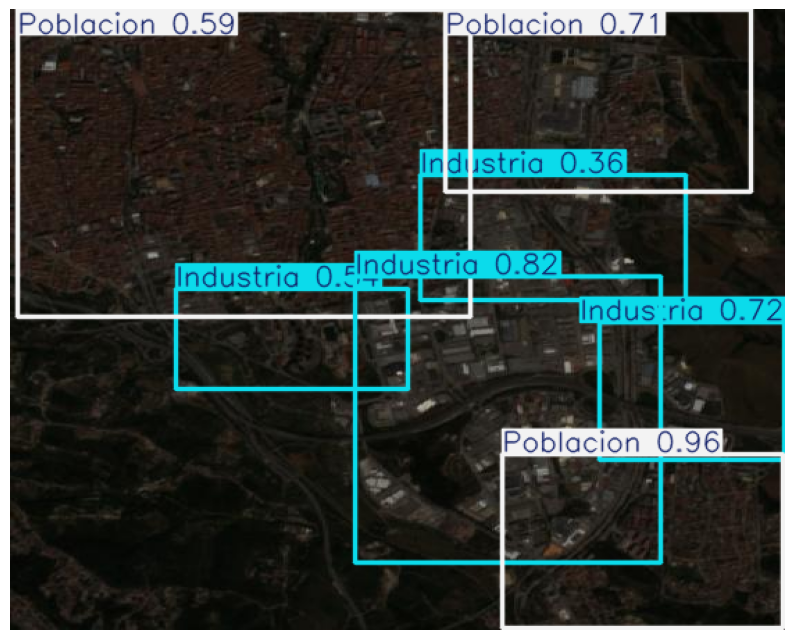

In [8]:
from ultralytics import YOLO
import cv2
import matplotlib.pyplot as plt

# Ruta a una imagen de prueba
imagen_prueba = r"C:\Users\crome\Desktop\VIU\Code\Datos\AMB\rgb_yolo\AMB_R7_C1_2018.jpg"

# Realizar la predicción
resultados = modelo(imagen_prueba)

# Dibujar las predicciones sobre la imagen
imagen_con_predicciones = resultados[0].plot()
%matplotlib inline
# Mostrar la imagen con predicciones
plt.figure(figsize=(10, 10))
plt.imshow(cv2.cvtColor(imagen_con_predicciones, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.show()



In [9]:
# Validar el modelo en el conjunto de validación
modelo.val(data=r"data_other_pc.yaml")

Ultralytics 8.3.39  Python-3.10.4 torch-2.1.0+cpu CPU (Intel Core(TM) i7-10750H 2.60GHz)


val: Scanning C:\Users\crome\Desktop\VIU\Code\Datos\AMB\rgb_yolo\val\labels.cache... 13 images, 0 backgrounds, 0 corrupt: 100%|██████████| 13/13 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.10it/s]


                   all         13         53      0.369      0.393      0.299       0.12
              Agricola          3          7       0.38      0.286      0.306      0.105
             Industria         10         21      0.297      0.333      0.192     0.0785
             Poblacion         12         25      0.431       0.56      0.399      0.175
Speed: 1.7ms preprocess, 55.1ms inference, 0.0ms loss, 5.9ms postprocess per image
Results saved to runs\detect\val5


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x00000275AAB58580>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          

# Datos Temporales

In [ ]:
import numpy as np
import rasterio
import os
from glob import glob
from skimage.transform import resize
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import os

IMAGENES_DIR = r"C:/Users/crome/Desktop/VIU/Code/Datos/AMB_TEMP/images"
MASCARAS_DIR = r"C:/Users/crome/Desktop/VIU/Code/Datos/AMB_TEMP/masks"
OUT_YOLO_DIR = "C:/Users/crome/Desktop/VIU/Code/Datos/AMB_TEMP/npy_files/"

years = [2020, 2022, 2024]

for year in years:

    folder = "C:/Users/crome/Desktop/VIU/Code/Datos/AMB_"+str(year)+"/"
    tif_files = sorted(glob("C:/Users/crome/Desktop/VIU/Code/Datos/AMB_"+str(year)+"/*.tif"))

    os.makedirs(IMAGENES_DIR, exist_ok=True)
    os.makedirs(MASCARAS_DIR, exist_ok=True)
    os.makedirs(OUT_YOLO_DIR, exist_ok=True)

    # u-net:
    target_rgb_shape = (256, 256, 3)
    target_mask_shape = (256, 256)

    errores = []

    for tif_path in tif_files:
        name = os.path.basename(tif_path).replace('.tif', '')

        try:
            with rasterio.open(tif_path) as src:
                img = src.read()

            rgb = np.stack([img[0], img[1], img[2]], axis=-1).astype(np.float32) / 10000.0
            mask = img[3].astype(np.uint8)

            # Redimensionar
            rgb = resize(rgb, target_rgb_shape, preserve_range=True, anti_aliasing=True)
            mask = resize(mask, target_mask_shape, order=0, preserve_range=True).astype(np.uint8)

            np.save(os.path.join(IMAGENES_DIR, f'{name}_rgb.npy'), rgb)
            np.save(os.path.join(MASCARAS_DIR, f'{name}_mask.npy'), mask)

        except Exception as e:
            print(f"Error procesando {name}: {e}")
            errores.append(name)

    print("Conversión completada.")
    if errores:
        print("Errores en archivos:", errores)

    # Yolo:

    for tif_file in sorted(glob(os.path.join(folder, 'AMB_*.tif'))):
        with rasterio.open(tif_file) as src:
            img = src.read([1, 2, 3])  # B4, B3, B2 (ajustar si es Sentinel)
            img = np.clip(img, 0, 10000) / 10000.0
            img = (img.transpose(1, 2, 0) * 255).astype(np.uint8)

            name = os.path.basename(tif_file).replace('.tif', '.jpg')
            Image.fromarray(img).save(os.path.join(OUT_YOLO_DIR, name))



Conversión completada.
Conversión completada.
Conversión completada.


1/1 [==============================] - 1s 617ms/step

image 1/1 C:\Users\crome\Desktop\VIU\Code\Datos\AMB_TEMP\npy_files\AMB_R7_C5_2020.jpg: 544x640 1 Agricola, 4 Industrias, 3 Poblacions, 316.4ms
Speed: 12.1ms preprocess, 316.4ms inference, 12.0ms postprocess per image at shape (1, 3, 544, 640)
1/1 [==============================] - 0s 184ms/step

image 1/1 C:\Users\crome\Desktop\VIU\Code\Datos\AMB_TEMP\npy_files\AMB_R7_C5_2022.jpg: 544x640 1 Agricola, 4 Industrias, 3 Poblacions, 132.7ms
Speed: 8.1ms preprocess, 132.7ms inference, 0.0ms postprocess per image at shape (1, 3, 544, 640)
1/1 [==============================] - 0s 187ms/step

image 1/1 C:\Users\crome\Desktop\VIU\Code\Datos\AMB_TEMP\npy_files\AMB_R7_C5_2024.jpg: 544x640 1 Agricola, 3 Industrias, 3 Poblacions, 210.6ms
Speed: 6.0ms preprocess, 210.6ms inference, 2.0ms postprocess per image at shape (1, 3, 544, 640)


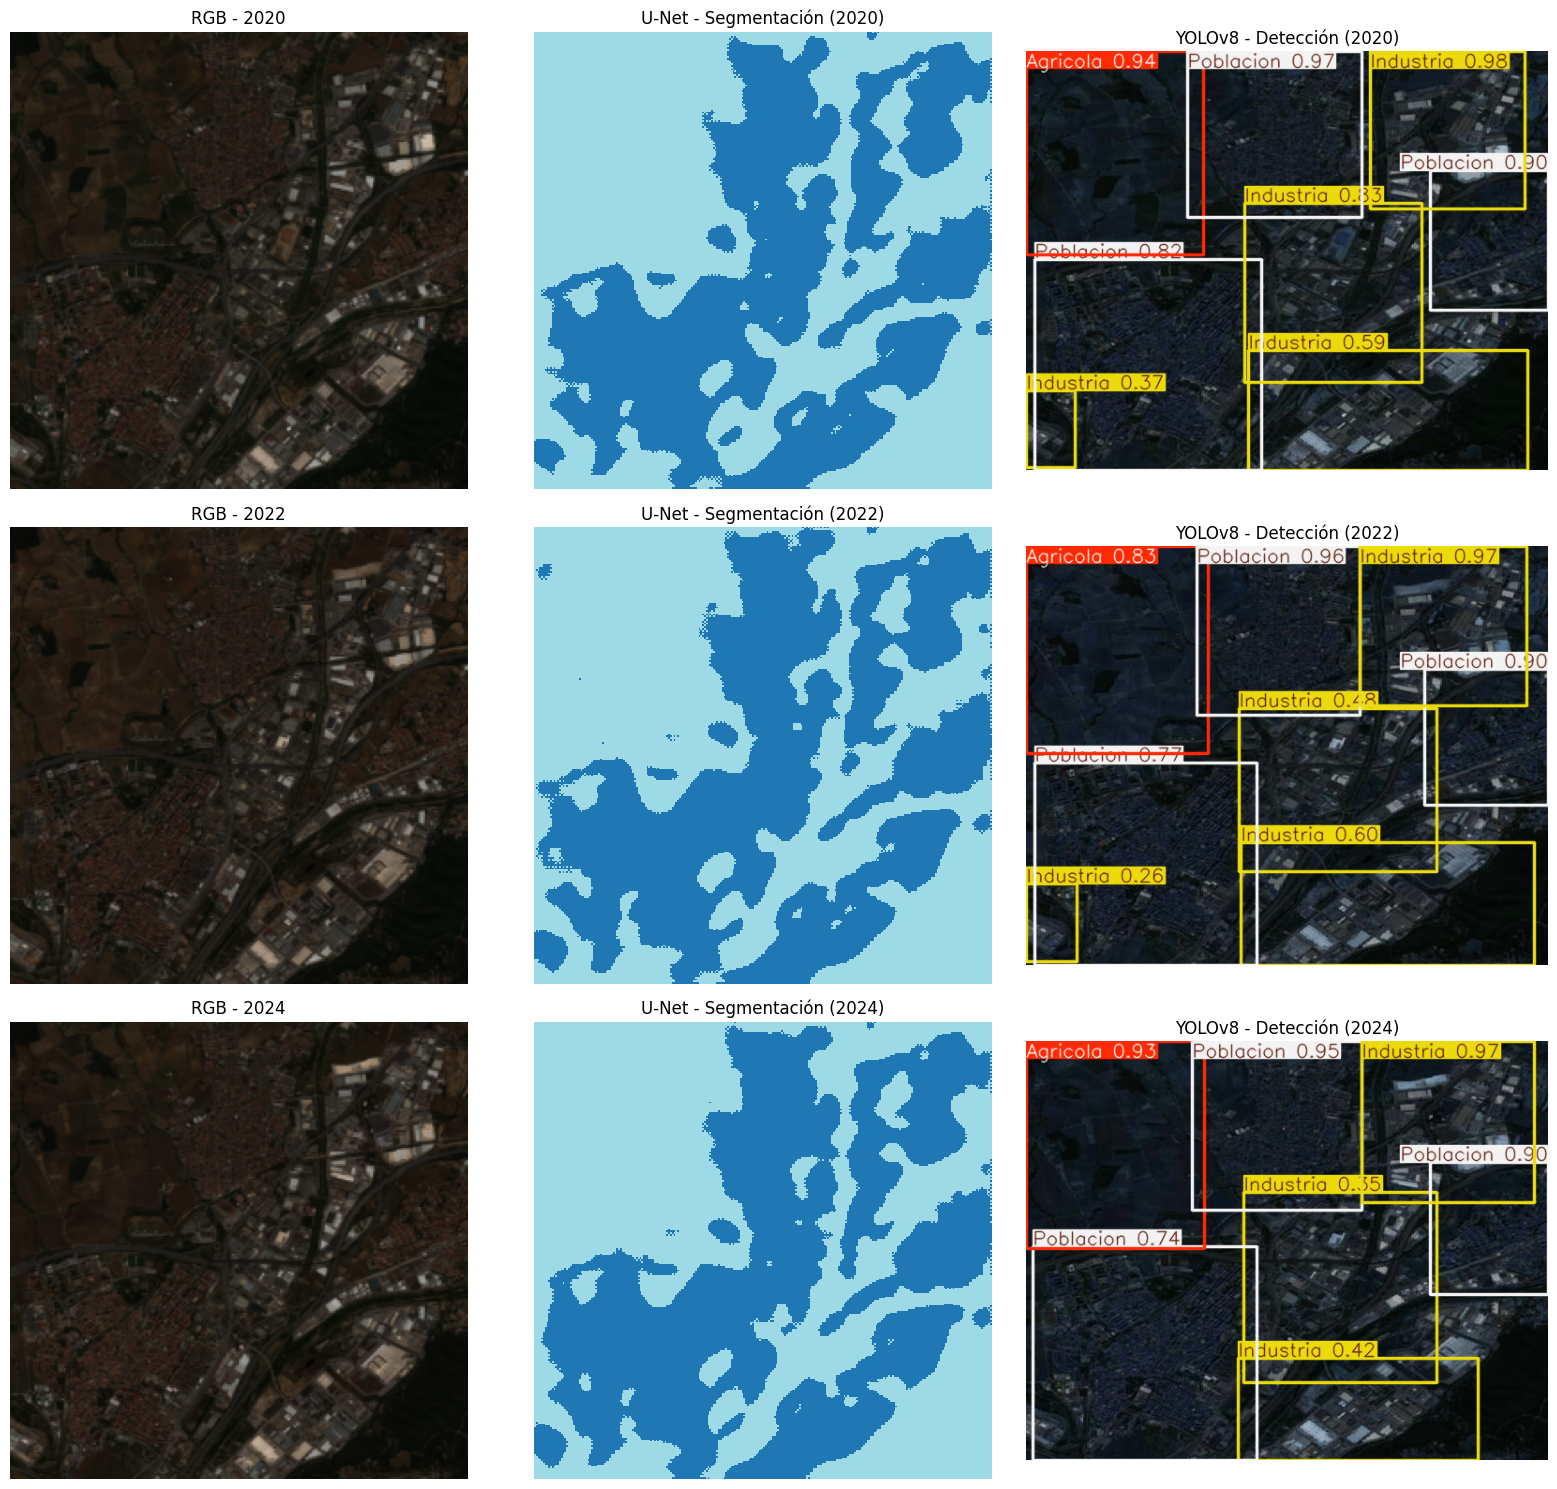

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
from ultralytics import YOLO
import os
import cv2
from PIL import Image

# Cargar modelos
model_unet = load_model("mejor_modelo.h5")
modelo_yolo = YOLO(r"C:\Users\crome\Desktop\VIU\Code\runs\detect\yolov8_model9\weights\best.pt")


def predecir_unet(img):
    if img.max() > 1: img = img / 10000.0
    pred = model_unet.predict(np.expand_dims(img, axis=0))[0]
    return np.argmax(pred, axis=-1)

def predecir_yolo(imagen_path):
    resultados = modelo_yolo(imagen_path)
    return resultados[0]


fechas = ["2020", "2022", "2024"]
zona = "R7_C5"

# Ruta de imágenes .npy y .jpg
RGB_NPY_DIR = r"C:/Users/crome/Desktop/VIU/Code/Datos/AMB_TEMP/images"
RGB_JPG_DIR = "C:/Users/crome/Desktop/VIU/Code/Datos/AMB_TEMP/npy_files/"

# Cargar imágenes .npy para U-Net
imagenes_rgb = {
    year: np.load(os.path.join(RGB_NPY_DIR, f"AMB_{zona}_{year}_rgb.npy"))
    for year in fechas
}

# Visualización conjunta
fig, axs = plt.subplots(len(fechas), 3, figsize=(16, 5 * len(fechas)))

for i, year in enumerate(fechas):
    # 1. Imagen RGB
    rgb = imagenes_rgb[year]

    # 2. Predicción U-Net
    pred_mask = predecir_unet(rgb)

    # 3. Predicción YOLO
    imagen_jpg_path = os.path.join(RGB_JPG_DIR, f"AMB_{zona}_{year}.jpg")
    pred_yolo = predecir_yolo(imagen_jpg_path)

    # Mostrar
    axs[i, 0].imshow(rgb)
    axs[i, 0].set_title(f"RGB - {year}")
    axs[i, 0].axis('off')

    axs[i, 1].imshow(pred_mask, cmap='tab20', interpolation='none')
    axs[i, 1].set_title(f"U-Net - Segmentación ({year})")
    axs[i, 1].axis('off')

    axs[i, 2].imshow(pred_yolo.plot())
    axs[i, 2].set_title(f"YOLOv8 - Detección ({year})")
    axs[i, 2].axis('off')

plt.tight_layout()
plt.show()



In [2]:
def comparar_segmentacion(mask1, mask2):
    cambio = mask1 != mask2
    total = cambio.size
    n_cambiado = np.sum(cambio)
    porcentaje_cambiado = 100 * n_cambiado / total
    return n_cambiado, porcentaje_cambiado

# Comparaciones entre años
cambios_unet = {}
for y1, y2 in [("2020", "2022"), ("2022", "2024"), ("2020", "2024")]:
    m1 = predecir_unet(imagenes_rgb[y1])
    m2 = predecir_unet(imagenes_rgb[y2])
    n, p = comparar_segmentacion(m1, m2)
    cambios_unet[f"{y1}-{y2}"] = {"px_cambiados": n, "porcentaje": round(p, 2)}

# Mostrar resultados
print("Cambios en segmentación (U-Net):")
for k, v in cambios_unet.items():
    print(f"- {k}: {v['px_cambiados']} píxeles cambiados ({v['porcentaje']}%)")


from collections import Counter

# Inicializar diccionario
conteo_yolo = {}

for year in fechas:
    jpg_path = os.path.join(RGB_JPG_DIR, f"AMB_{zona}_{year}.jpg")
    resultado = predecir_yolo(jpg_path)

    clases = resultado.names
    ids_detectados = [int(cls) for cls in resultado.boxes.cls.cpu().numpy()]
    conteo = Counter(ids_detectados)

    # Guardamos con nombre de clase
    conteo_yolo[year] = {clases[k]: v for k, v in conteo.items()}

# Mostrar
print("Conteo YOLO por clase:")
for year in conteo_yolo:
    print(f"\n🗓 Año {year}:")
    for clase, count in conteo_yolo[year].items():
        print(f"- {clase}: {count} detecciones")



1/1 [==============================] - 0s 113ms/step
Cambios en segmentación (U-Net):
- 2020-2022: 3016 píxeles cambiados (4.6%)
- 2022-2024: 2872 píxeles cambiados (4.38%)
- 2020-2024: 3284 píxeles cambiados (5.01%)

image 1/1 C:\Users\crome\Desktop\VIU\Code\Datos\AMB_TEMP\npy_files\AMB_R7_C5_2020.jpg: 544x640 1 Agricola, 4 Industrias, 3 Poblacions, 92.2ms
Speed: 4.3ms preprocess, 92.2ms inference, 2.0ms postprocess per image at shape (1, 3, 544, 640)

image 1/1 C:\Users\crome\Desktop\VIU\Code\Datos\AMB_TEMP\npy_files\AMB_R7_C5_2022.jpg: 544x640 1 Agricola, 4 Industrias, 3 Poblacions, 207.0ms
Speed: 4.2ms preprocess, 207.0ms inference, 2.0ms postprocess per image at shape (1, 3, 544, 640)

image 1/1 C:\Users\crome\Desktop\VIU\Code\Datos\AMB_TEMP\npy_files\AMB_R7_C5_2024.jpg: 544x640 1 Agricola, 3 Industrias, 3 Poblacions, 104.6ms
Speed: 2.0ms preprocess, 104.6ms inference, 0.0ms postprocess per image at shape (1, 3, 544, 640)
Conteo YOLO por clase:

🗓 Año 2020:
- Industria: 4 deteccio

In [6]:
import matplotlib.pyplot as plt

def calcular_ict(unet_cambios, yolo_conteos, clases_objetivo=["Población", "Industria", "Agrícola"]):
    comparaciones = list(unet_cambios.keys())
    indice_compuesto = {}

    for comp in comparaciones:
        y1, y2 = comp.split("-")
        
        cambio_pct = unet_cambios[comp]["porcentaje"]
        cambio_norm = cambio_pct / 100
        
        yolo_y1 = sum(yolo_conteos[y1].get(cl, 0) for cl in clases_objetivo)
        yolo_y2 = sum(yolo_conteos[y2].get(cl, 0) for cl in clases_objetivo)
        yolo_diff = abs(yolo_y2 - yolo_y1)
        yolo_total = max(yolo_y1, yolo_y2, 1)
        yolo_norm = yolo_diff / yolo_total

        ictt = round((cambio_norm + yolo_norm) / 2, 3)

        indice_compuesto[comp] = {
            "cambio_pct": cambio_pct,
            "yolo_diff": yolo_diff,
            "cambio_norm": cambio_norm,
            "yolo_norm": yolo_norm,
            "ICTT": ictt
        }

    return indice_compuesto

# Uso:
ictt_resultado = calcular_ict(cambios_unet, conteo_yolo)

# Mostrar
print("\nÍndice Compuesto de Transformación Territorial (ICTT):")
for comp, v in ictt_resultado.items():
    print(f"- {comp}: {v['ICTT']} (U-Net: {v['cambio_pct']}%, YOLO Δ: {v['yolo_diff']})")



Índice Compuesto de Transformación Territorial (ICTT):
- 2020-2022: 0.023 (U-Net: 4.6%, YOLO Δ: 0)
- 2022-2024: 0.147 (U-Net: 4.38%, YOLO Δ: 1)
- 2020-2024: 0.15 (U-Net: 5.01%, YOLO Δ: 1)


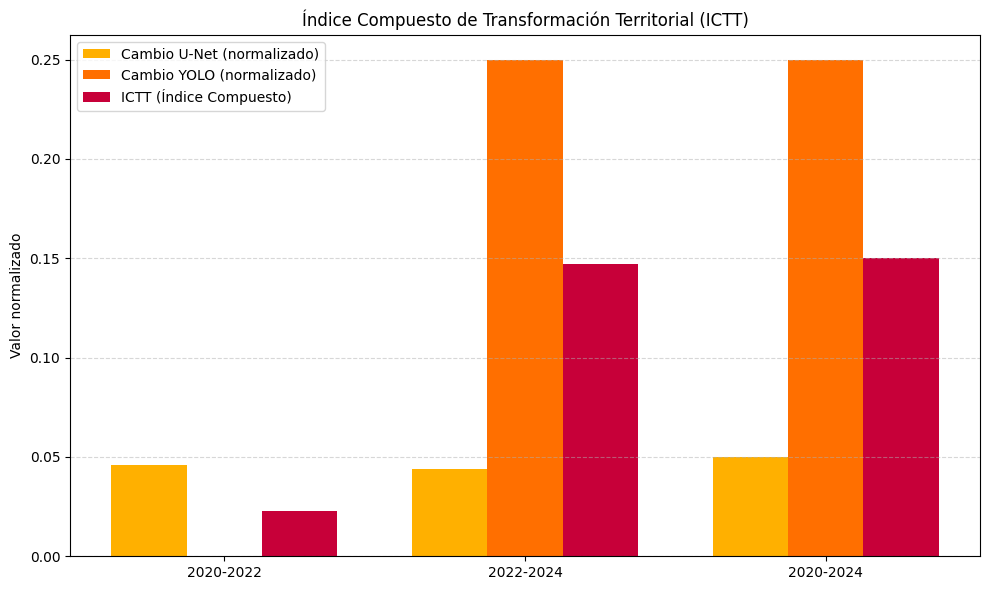

In [7]:
# Visualizar como gráfico
comparaciones = list(ictt_resultado.keys())
unet_values = [ictt_resultado[c]["cambio_norm"] for c in comparaciones]
yolo_values = [ictt_resultado[c]["yolo_norm"] for c in comparaciones]
ictt_values = [ictt_resultado[c]["ICTT"] for c in comparaciones]

x = range(len(comparaciones))
width = 0.25

plt.figure(figsize=(10, 6))
plt.bar([i - width for i in x], unet_values, width=width, label="Cambio U-Net (normalizado)", color="#FFB000")
plt.bar(x, yolo_values, width=width, label="Cambio YOLO (normalizado)", color="#FF6F00")
plt.bar([i + width for i in x], ictt_values, width=width, label="ICTT (Índice Compuesto)", color="#C70039")

plt.xticks(x, comparaciones)
plt.ylabel("Valor normalizado")
plt.title("Índice Compuesto de Transformación Territorial (ICTT)")
plt.legend()
plt.grid(axis="y", linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()